# Partial PCA for GLIC New Ensemble

In [1]:
#XRD Ensemble
#28 4NPQ
#18 4HFI

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

## Partial PCA Plotting

In [4]:
def partial_pca(traj,residue_selection):
    #silce traj
    topology = traj.topology
    traj = traj.atom_slice(topology.select(residue_selection))
    traj.superpose(traj,28)
    #partial PCA 
    ppca = PCA(n_components=2)
    partial_reduced_cartesian = ppca.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms * 3))
    print(traj.n_atoms)
    print(partial_reduced_cartesian.shape)
    print(ppca.explained_variance_ratio_)
    fig = plt.figure()
    plt.scatter(partial_reduced_cartesian[:,0], partial_reduced_cartesian[:,1],c=traj.time,marker='x')
    cbar = plt.colorbar()
    plt.scatter(partial_reduced_cartesian[28,0], partial_reduced_cartesian[28,1],marker='o',c='red')
    plt.scatter(partial_reduced_cartesian[29,0], partial_reduced_cartesian[29,1],marker='o',c='red')

    plt.scatter(partial_reduced_cartesian[18,0], partial_reduced_cartesian[18,1],marker='o',c='orange')

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Partial PCA for ' + residue_selection)
    cbar.set_label('states')
    plt.show()

### whole PCA Plotting

[ 0.60059851  0.22371104]


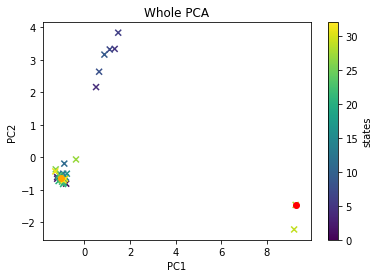

In [7]:
wholetraj = md.load("/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/new_ensemble.pdb")
wholetraj.superpose(wholetraj,28)
wholepca = PCA(n_components=2)
#wholepca.fit(wholetraj.xyz.reshape(wholetraj.n_frames, wholetraj.n_atoms * 3))
whole_reduced_cartesian = wholepca.fit_transform(wholetraj.xyz.reshape(wholetraj.n_frames, wholetraj.n_atoms * 3))
print(wholepca.explained_variance_ratio_)
fig = plt.figure()
plt.scatter(whole_reduced_cartesian[:,0], whole_reduced_cartesian[:,1],c=wholetraj.time,marker='x')
cbar = plt.colorbar()
plt.scatter(whole_reduced_cartesian[28,0], whole_reduced_cartesian[28,1],marker='o',c='red')
plt.scatter(whole_reduced_cartesian[18,0], whole_reduced_cartesian[18,1],marker='o',c='orange')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Whole PCA')
cbar.set_label('states')
plt.show()

### Selected Partial PCA plotting

455
(33, 2)
[ 0.55476153  0.33626187]


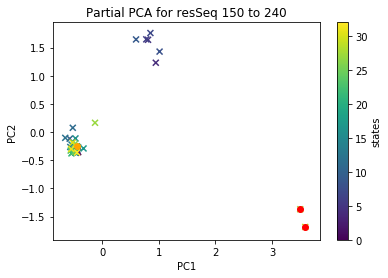

In [6]:
#tmd
partial_pca(wholetraj,"resSeq 150 to 240")

590
(33, 2)
[ 0.78432471  0.11874808]


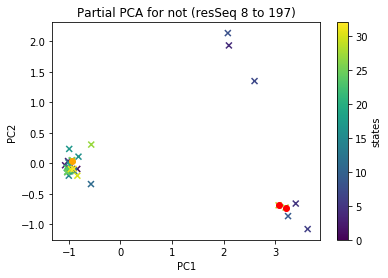

In [7]:
#ecd
partial_pca(wholetraj,"not (resSeq 8 to 197)")

1515
(33, 2)
[ 0.59846765  0.22626126]


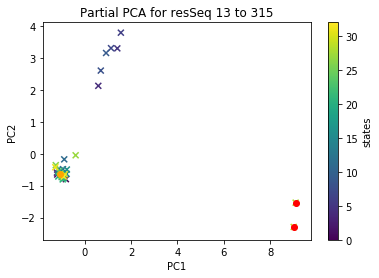

In [8]:
#ecd without res 8 to 12
partial_pca(wholetraj,"resSeq 13 to 315")

120
(33, 2)
[0.96812971 0.00944451]


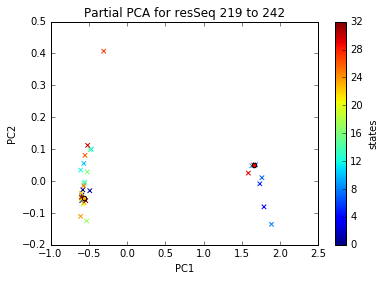

In [9]:
#pore helix
partial_pca(wholetraj,"resSeq 219 to 242")

1515
(33, 2)
[0.5984677  0.22626123]


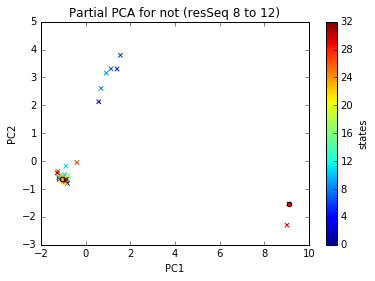

In [10]:
#without res 8 to 12
partial_pca(wholetraj,"not (resSeq 8 to 12)")

### Approach: find the best PCA

In [11]:
def find_best_partial_pca_start(traj):
    topology = traj.topology
    pc1 = []
    for i in range (13,316):
        residue_selection = 'resSeq 13 to ' + str(i)
        traj_slice = traj.atom_slice(topology.select(residue_selection))
        traj_slice.superpose(traj_slice,28)

        ppca = PCA(n_components=2)
        partial_reduced_cartesian = ppca.fit_transform(traj_slice.xyz.reshape(traj_slice.n_frames, traj_slice.n_atoms * 3))
        pc1.append([i,ppca.explained_variance_ratio_[0],ppca.explained_variance_ratio_[1]])
    return np.asarray(pc1)

In [12]:
def find_best_partial_pca_end(traj):
    topology = traj.topology
    pc1 = []
    for i in range (8,316):
        residue_selection = 'resSeq ' + str(i) + ' to 315'
        traj_slice = traj.atom_slice(topology.select(residue_selection))
        traj_slice.superpose(traj_slice,28)
        ppca = PCA(n_components=2)
        partial_reduced_cartesian = ppca.fit_transform(traj_slice.xyz.reshape(traj_slice.n_frames, traj_slice.n_atoms * 3))
        pc1.append([i,ppca.explained_variance_ratio_[0],ppca.explained_variance_ratio_[1]])
    return np.asarray(pc1)

In [13]:
def find_best_partial_pca_3D(traj):
    topology = traj.topology
    pc1 = []
    for i in range (8,316):
        for j in range (0,316-i):
        #residue_selection = 'resSeq 8 to ' + str(i)
            residue_selection = 'resSeq ' + str(i) + ' to ' + str(i + j)
            traj_slice = traj.atom_slice(topology.select(residue_selection))
            traj_slice.superpose(traj_slice,28)

            ppca = PCA(n_components=1)
            partial_reduced_cartesian = ppca.fit_transform(traj_slice.xyz.reshape(traj_slice.n_frames, traj_slice.n_atoms * 3))
            pc1.append([i,j,ppca.explained_variance_ratio_[0]])
    return np.asarray(pc1)

In [14]:
pc_start = find_best_partial_pca_start(wholetraj)

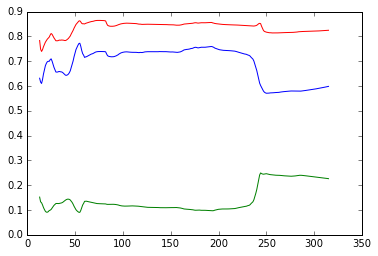

In [15]:
fig = plt.figure()
plt.plot(pc_start[:, 0],pc_start[:, 1])
plt.plot(pc_start[:, 0],pc_start[:, 2])
plt.plot(pc_start[:, 0],pc_start[:, 1] + pc_start[:, 2])

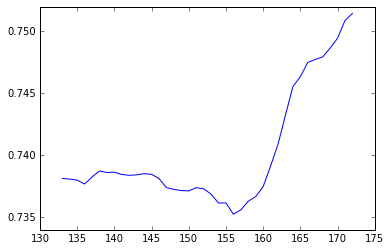

In [16]:
fig = plt.figure()
plt.plot(pc_start[120:160, 0],pc_start[120:160, 1])

In [17]:
pc_end = find_best_partial_pca_end(wholetraj)

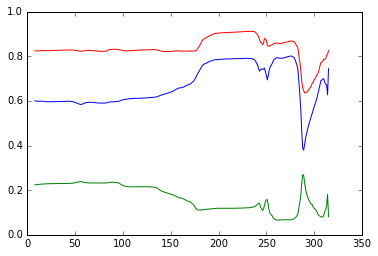

In [18]:
fig = plt.figure()
plt.plot(pc_end[:, 0],pc_end[:, 1])
plt.plot(pc_end[:, 0],pc_end[:, 2])
plt.plot(pc_end[:, 0],pc_end[:, 1] + pc_end[:, 2])

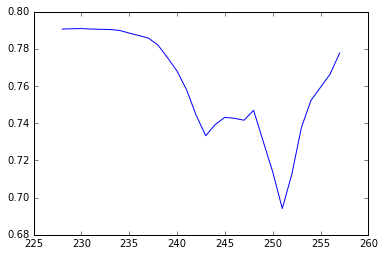

In [19]:
fig = plt.figure()

plt.plot(pc_end[220:250, 0],pc_end[220:250, 1])

## Projection of MD on Partial PCA

In [20]:
def ppca_reduced_cartesian(residue_selection):
    wholetraj = md.load("/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/new_ensemble.pdb")
    wholetraj.superpose(wholetraj,28)
    topology = wholetraj.topology
    wholetraj_sliced = wholetraj.atom_slice(topology.select(residue_selection))
    wholetraj_sliced.superpose(wholetraj_sliced,28)
    ppca = PCA(n_components=2)
    partial_reduced_cartesian = ppca.fit_transform(wholetraj_sliced.xyz.reshape(wholetraj_sliced.n_frames, wholetraj_sliced.n_atoms * 3))
    return partial_reduced_cartesian, wholetraj_sliced, ppca

In [21]:
def projection_on_ppca(md_rep, molecule,residue_selection):
    partial_reduced_cartesian, wholetraj_sliced, ppca = ppca_reduced_cartesian(residue_selection)
    if md_rep == '1':
        traj_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md.skip100.ca.xtc'
        top_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md.ca.gro'
        superpose_num = 28
    elif md_rep == '4HFI':
        location = '/media/scottzhuang/data/MD/4HFI_ph46_md1/'
        traj_location = location + molecule + '/mdrun/4HFI_ph46_' + molecule + '_md.skip1.ca.xtc' 
        top_location = location + molecule + '/mdrun/4HFI_ph46_' + molecule + '_md.ca.gro' 
        superpose_num = 18
    else:
        traj_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md' + md_rep + '.skip100.ca.xtc'
        top_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md' + md_rep + '.ca.gro'
        superpose_num = 28
    traj = md.load(traj_location,top=top_location)
    topology = traj.topology
    traj = traj.atom_slice(topology.select(residue_selection + "and not resSeq 5 to 7"))
    traj.superpose(wholetraj_sliced,superpose_num)
    reduced_cartesian = ppca.transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms * 3))
    fig = plt.figure()
    plt.scatter(reduced_cartesian[:,0],reduced_cartesian[:,1],c=traj.time,alpha=0.1)
    cbar = plt.colorbar()
    avg_md_cartesian = np.mean(reduced_cartesian[:, :], axis=0)
    plt.scatter(avg_md_cartesian[0],avg_md_cartesian[1],marker='o',c='black')
    plt.scatter(partial_reduced_cartesian[:,0], partial_reduced_cartesian[:,1],c='black',marker='^')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('MD_' + md_rep + '  ' + molecule + ' Projection on Partial PCA with selection: ' + residue_selection)
    cbar.set_label('time')
    plt.show()

In [22]:
residue_selection = "(resSeq 198 to 315)"

590
(33, 2)
[0.78432452 0.11874806]


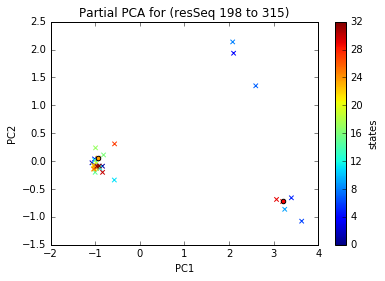

In [23]:
partial_pca(wholetraj,residue_selection)

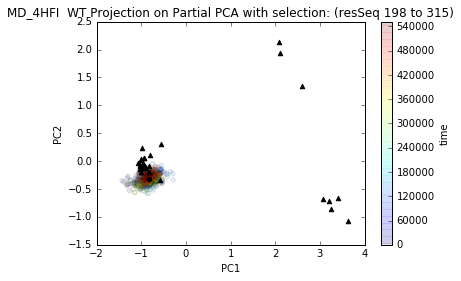

In [24]:
projection_on_ppca("4HFI","WT",residue_selection)

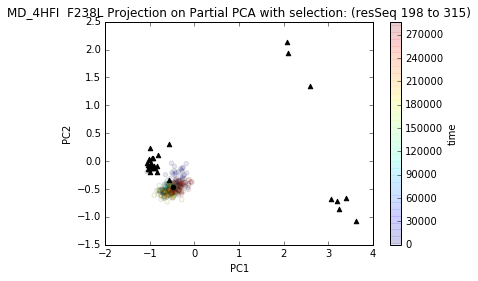

In [25]:
projection_on_ppca("4HFI","F238L",residue_selection)

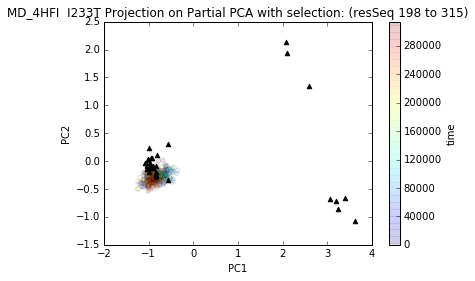

In [26]:
projection_on_ppca("4HFI","I233T",residue_selection)

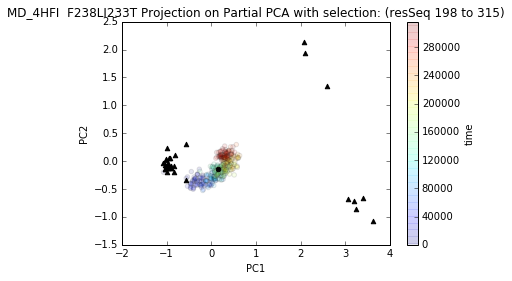

In [27]:
projection_on_ppca("4HFI","F238LI233T",residue_selection)

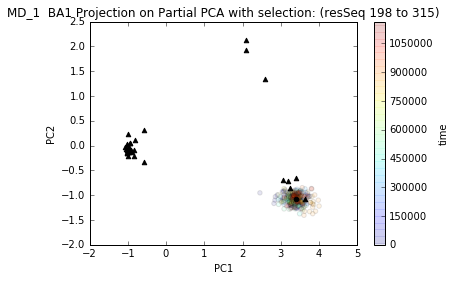

In [28]:
projection_on_ppca("1","BA1",residue_selection)

In [29]:
def projection_on_ppca_stand(traj_location, top_location,superpose_num,residue_selection,note):
    partial_reduced_cartesian, wholetraj_sliced, ppca = ppca_reduced_cartesian(residue_selection)
    traj = md.load(traj_location,top=top_location)
    topology = traj.topology
    traj = traj.atom_slice(topology.select(residue_selection + "and not resSeq 5 to 7"))
    traj.superpose(wholetraj_sliced,superpose_num)
    reduced_cartesian = ppca.transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms * 3))
    fig = plt.figure()
    plt.scatter(reduced_cartesian[:,0],reduced_cartesian[:,1],c=traj.time)
    cbar = plt.colorbar()
    avg_md_cartesian = np.mean(reduced_cartesian[:, :], axis=0)
    plt.scatter(avg_md_cartesian[0],avg_md_cartesian[1],marker='o',c='black')
    plt.scatter(partial_reduced_cartesian[:,0], partial_reduced_cartesian[:,1],c='black',marker='^',alpha=0.1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('MD_' + note + ' Projection on Partial PCA with selection: ' + residue_selection)
    cbar.set_label('time')
    plt.show()

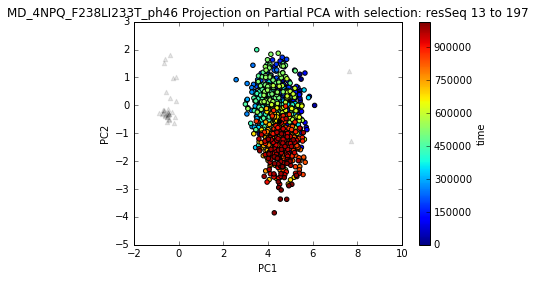

In [30]:
projection_on_ppca_stand("/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_233_238_mut_pH46_2/4NPQ_233_238_mut_pH46_md2.skip10.ca.xtc"
                              ,"/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_233_238_mut_pH46_2/4NPQ_233_238_mut_pH46_md2.ca.gro"
                              ,28,"resSeq 13 to 197"
                             ,"4NPQ_F238LI233T_ph46")

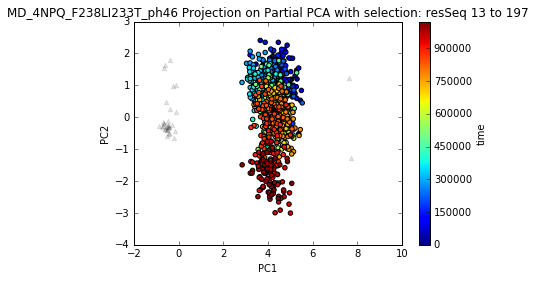

In [31]:
projection_on_ppca_stand("/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_233_238_mut_pH46/4NPQ_233_238_mut_pH46_md1.skip10.ca.xtc"
                              ,"/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_233_238_mut_pH46/4NPQ_233_238_mut_pH46_md1.ca.gro"
                              ,28,"resSeq 13 to 197"
                             ,"4NPQ_F238LI233T_ph46")

## Combined Partial PCA

In [2]:
#combine ECD PC1 and TMD PC1
def combined_ppca_reduced_cartesian(residue_selection_1,residue_selection_2):
    wholetraj = md.load("/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/new_ensemble.pdb")
    wholetraj.superpose(wholetraj,28)
    topology = wholetraj.topology
    wholetraj_sliced_ecd = wholetraj.atom_slice(topology.select(residue_selection_1))
    wholetraj_sliced_ecd.superpose(wholetraj_sliced_ecd,28)
    wholetraj_sliced_tmd = wholetraj.atom_slice(topology.select(residue_selection_2))
    wholetraj_sliced_tmd.superpose(wholetraj_sliced_tmd,28)
    ppca_ecd = PCA(n_components=1)
    ppca_tmd = PCA(n_components=1)
    partial_reduced_cartesian = [ppca_ecd.fit_transform(wholetraj_sliced_ecd.xyz.reshape(wholetraj_sliced_ecd.n_frames, wholetraj_sliced_ecd.n_atoms * 3)), ppca_tmd.fit_transform(wholetraj_sliced_tmd.xyz.reshape(wholetraj_sliced_tmd.n_frames, wholetraj_sliced_tmd.n_atoms * 3))]    
    print(ppca_ecd.explained_variance_ratio_)
    print(ppca_tmd.explained_variance_ratio_)
    return partial_reduced_cartesian, wholetraj_sliced_ecd, wholetraj_sliced_tmd,ppca_ecd,ppca_tmd

In [5]:
def projection_on_combined_ppca(md_rep, molecule,residue_selection_1 = "resSeq 13 to 197", residue_selection_2 = "resSeq 198 to 315"):
    
    def combined_ppca_reduced_cartesian(residue_selection_1,residue_selection_2):
        wholetraj = md.load("/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/new_ensemble.pdb")
        wholetraj.superpose(wholetraj,28)
        topology = wholetraj.topology
        wholetraj_sliced_ecd = wholetraj.atom_slice(topology.select(residue_selection_1))
        wholetraj_sliced_ecd.superpose(wholetraj_sliced_ecd,28)
        wholetraj_sliced_tmd = wholetraj.atom_slice(topology.select(residue_selection_2))
        wholetraj_sliced_tmd.superpose(wholetraj_sliced_tmd,28)
        ppca_ecd = PCA(n_components=1)
        ppca_tmd = PCA(n_components=1)
        partial_reduced_cartesian = [ppca_ecd.fit_transform(wholetraj_sliced_ecd.xyz.reshape(wholetraj_sliced_ecd.n_frames, wholetraj_sliced_ecd.n_atoms * 3)), ppca_tmd.fit_transform(wholetraj_sliced_tmd.xyz.reshape(wholetraj_sliced_tmd.n_frames, wholetraj_sliced_tmd.n_atoms * 3))]    
        print(ppca_ecd.explained_variance_ratio_)
        print(ppca_tmd.explained_variance_ratio_)
        return partial_reduced_cartesian, wholetraj_sliced_ecd, wholetraj_sliced_tmd,ppca_ecd,ppca_tmd
    
    partial_reduced_cartesian, wholetraj_sliced_ecd,wholetraj_sliced_tmd, ppca_ecd,ppca_tmd = combined_ppca_reduced_cartesian(residue_selection_1,residue_selection_2)
    
    if md_rep == '1':
        traj_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md.skip100.ca.xtc'
        top_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md.ca.gro'
        superpose_num = 28
    elif md_rep == '4HFI':
        location = '/media/scottzhuang/data/MD/4HFI_ph46_md1/'
        traj_location = location + molecule + '/mdrun/4HFI_ph46_' + molecule + '_md.skip10.ca.xtc' 
        top_location = location + molecule + '/mdrun/4HFI_ph46_' + molecule + '_md.ca.gro' 
        superpose_num = 18
    elif md_rep == '2':
        traj_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md' + md_rep + '.skip100.ca.xtc'
        top_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md' + md_rep + '.ca.gro'
        superpose_num = 28
    elif md_rep == '1_yzhuang':
        traj_location = '/media/scottzhuang/data/MD/4NPQ_PH70_md' + md_rep + '/4NPQ_pH70_' + molecule + '_md1' + '.skip10.ca.xtc'
        top_location = '/media/scottzhuang/data/MD/4NPQ_PH70_md' + md_rep + '/4NPQ_pH70_' + molecule + '_md1' + '.ca.gro'
        superpose_num = 28
    
    traj = md.load(traj_location,top=top_location)
    topology = traj.topology
    traj_sliced_ecd = traj.atom_slice(topology.select(residue_selection_1))
    traj_sliced_tmd = traj.atom_slice(topology.select(residue_selection_2))
    traj_sliced_ecd.superpose(wholetraj_sliced_ecd,superpose_num)
    traj_sliced_tmd.superpose(wholetraj_sliced_tmd,superpose_num)

    reduced_cartesian_ecd = ppca_ecd.transform(traj_sliced_ecd.xyz.reshape(traj_sliced_ecd.n_frames, traj_sliced_ecd.n_atoms * 3))
    reduced_cartesian_tmd = ppca_tmd.transform(traj_sliced_tmd.xyz.reshape(traj_sliced_tmd.n_frames, traj_sliced_tmd.n_atoms * 3))

    fig = plt.figure()
    plt.scatter(reduced_cartesian_ecd,reduced_cartesian_tmd,c=traj.time,alpha=0.3)
    cbar = plt.colorbar()
    plt.scatter(partial_reduced_cartesian[0], partial_reduced_cartesian[1],c='black',marker='^')
    plt.xlabel('PC1 ECD')
    plt.ylabel('PC1 TMD')
    plt.title('MD_' + md_rep + '  ' + molecule + ' Projection on Combined Partial PC1 with ' + residue_selection_1 + ' and ' + residue_selection_2)
    cbar.set_label('time')
    plt.show()

[ 0.5846861]
[ 0.77867138]


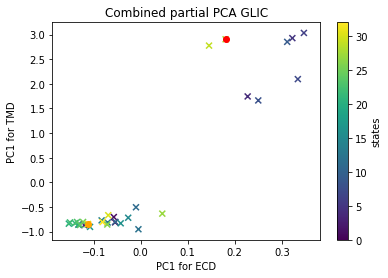

In [5]:
wholetraj = md.load("/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/new_ensemble.pdb")
combined_partial_reduced_cartesian,_,_,_,_ = combined_ppca_reduced_cartesian(residue_selection_1 = "resSeq 210 to 230", residue_selection_2 = "resSeq 230 to 265")
fig = plt.figure()
plt.scatter(combined_partial_reduced_cartesian[0], combined_partial_reduced_cartesian[1],c=wholetraj.time,marker='x')
cbar = plt.colorbar()
plt.scatter(combined_partial_reduced_cartesian[0][28], combined_partial_reduced_cartesian[1][28],marker='o',c='red')
plt.scatter(combined_partial_reduced_cartesian[0][18], combined_partial_reduced_cartesian[1][18],marker='o',c='orange')

plt.xlabel('PC1 for ECD')
plt.ylabel('PC1 for TMD')
plt.title('Combined partial PCA GLIC')
cbar.set_label('states')
plt.savefig("Combined_PCA.png")

[0.75145115]
[0.78432452]


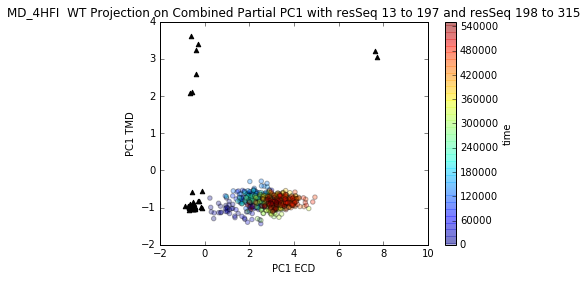

In [36]:
projection_on_combined_ppca("4HFI","WT")

[0.75145115]
[0.78432452]


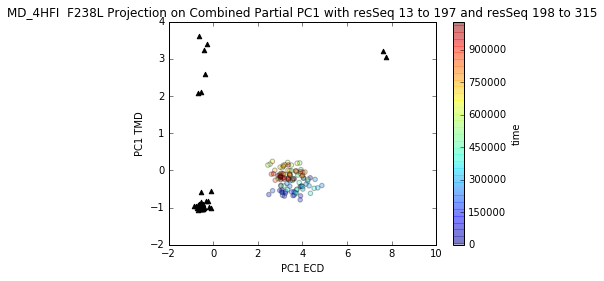

In [37]:
projection_on_combined_ppca("4HFI","F238L")

[0.75145115]
[0.78432452]


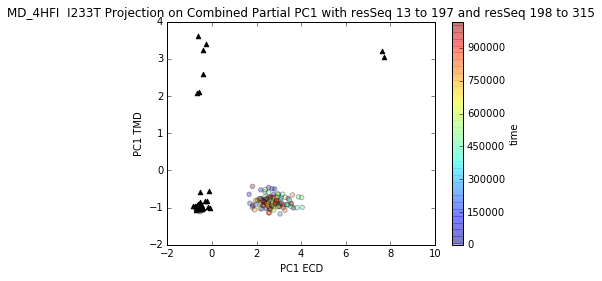

In [38]:
projection_on_combined_ppca("4HFI","I233T")

[0.75145115]
[0.78432452]


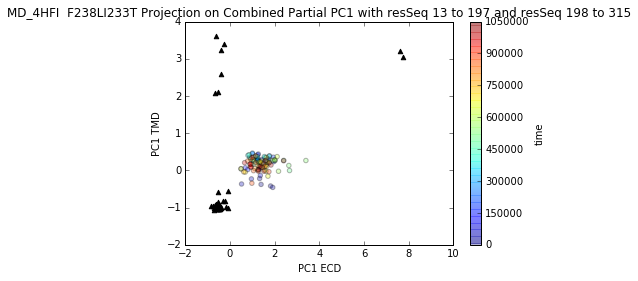

In [39]:
projection_on_combined_ppca("4HFI","F238LI233T")

[0.75145115]
[0.78432452]


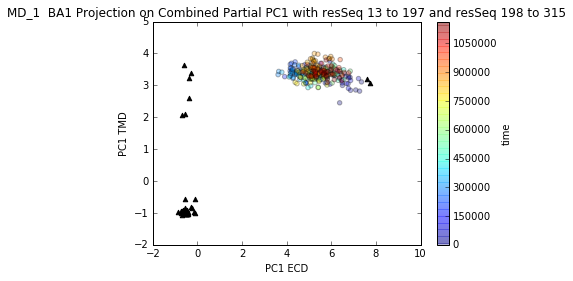

In [40]:
projection_on_combined_ppca("1","BA1")

[0.75145115]
[0.78432452]


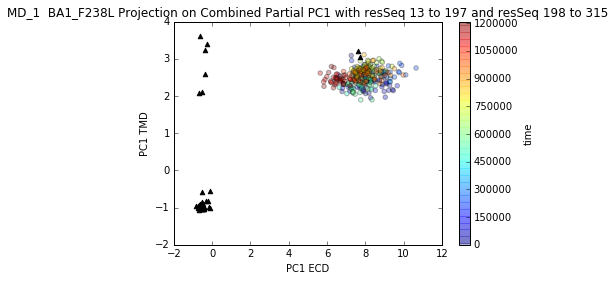

In [41]:
projection_on_combined_ppca("1","BA1_F238L")

[0.75145115]
[0.78432452]


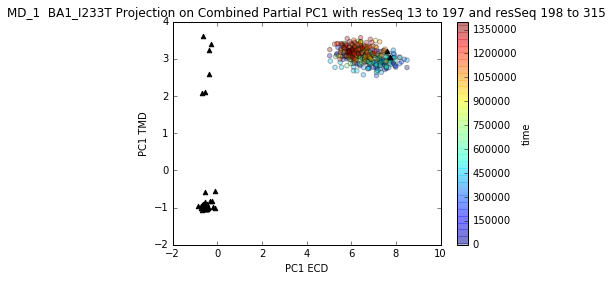

In [42]:
projection_on_combined_ppca("1","BA1_I233T")

[0.75145115]
[0.78432452]


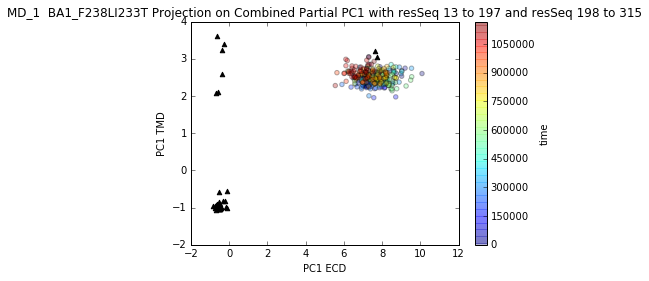

In [43]:
projection_on_combined_ppca("1","BA1_F238LI233T")

[0.75145115]
[0.78432452]


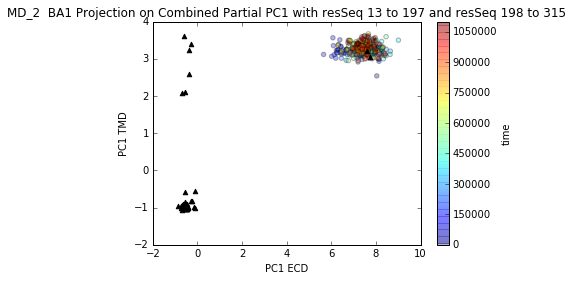

In [44]:
projection_on_combined_ppca("2","BA1")

[0.75145115]
[0.78432452]


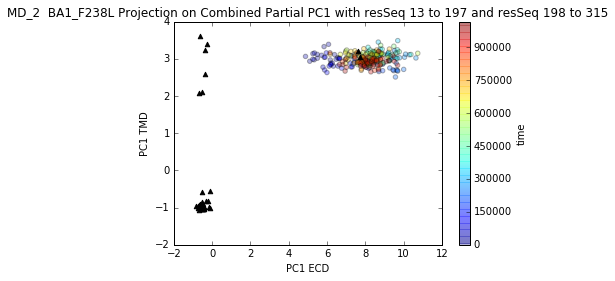

In [45]:
projection_on_combined_ppca("2","BA1_F238L")

[0.75145115]
[0.78432452]


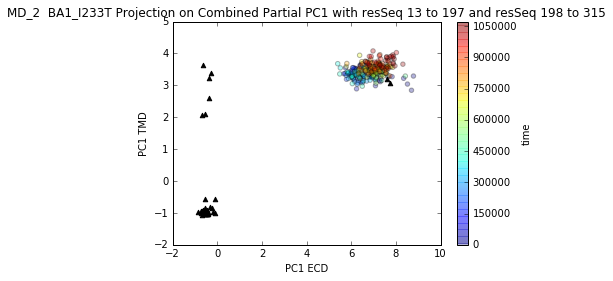

In [46]:
projection_on_combined_ppca("2","BA1_I233T")

[0.75145115]
[0.78432452]


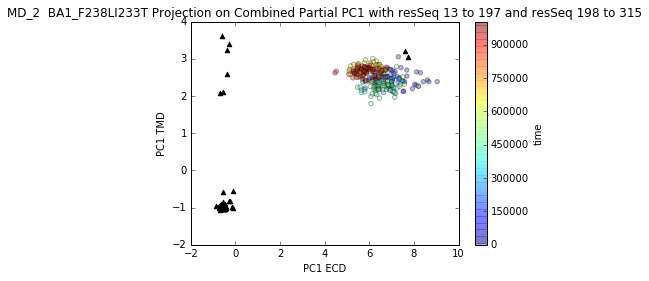

In [47]:
projection_on_combined_ppca("2","BA1_F238LI233T")

[0.75145115]
[0.78432452]


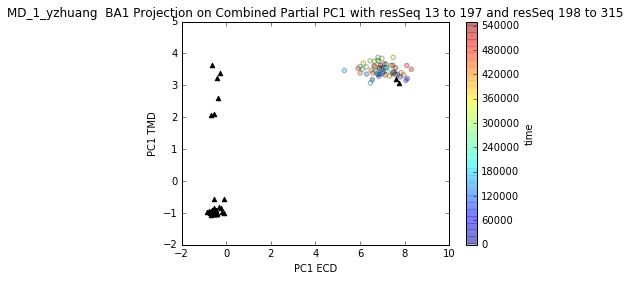

In [48]:
projection_on_combined_ppca("1_yzhuang","BA1")

In [49]:
def projection_on_combined_ppca_stand(traj_location, top_location, superpose_num,note,residue_selection_1 = "resSeq 13 to 197", residue_selection_2 = "resSeq 198 to 315"):
    
    def combined_ppca_reduced_cartesian(residue_selection_1,residue_selection_2):
        wholetraj = md.load("/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/new_ensemble.pdb")
        wholetraj.superpose(wholetraj,28)
        topology = wholetraj.topology
        wholetraj_sliced_ecd = wholetraj.atom_slice(topology.select(residue_selection_1))
        wholetraj_sliced_ecd.superpose(wholetraj_sliced_ecd,28)
        wholetraj_sliced_tmd = wholetraj.atom_slice(topology.select(residue_selection_2))
        wholetraj_sliced_tmd.superpose(wholetraj_sliced_tmd,28)
        ppca_ecd = PCA(n_components=1)
        ppca_tmd = PCA(n_components=1)
        partial_reduced_cartesian = [ppca_ecd.fit_transform(wholetraj_sliced_ecd.xyz.reshape(wholetraj_sliced_ecd.n_frames, wholetraj_sliced_ecd.n_atoms * 3)), ppca_tmd.fit_transform(wholetraj_sliced_tmd.xyz.reshape(wholetraj_sliced_tmd.n_frames, wholetraj_sliced_tmd.n_atoms * 3))]    
        print(ppca_ecd.explained_variance_ratio_)
        print(ppca_tmd.explained_variance_ratio_)
        return partial_reduced_cartesian, wholetraj_sliced_ecd, wholetraj_sliced_tmd,ppca_ecd,ppca_tmd
    
    partial_reduced_cartesian, wholetraj_sliced_ecd,wholetraj_sliced_tmd, ppca_ecd,ppca_tmd = combined_ppca_reduced_cartesian(residue_selection_1,residue_selection_2)
    traj = md.load(traj_location,top=top_location)
    topology = traj.topology
    traj_sliced_ecd = traj.atom_slice(topology.select(residue_selection_1))
    traj_sliced_tmd = traj.atom_slice(topology.select(residue_selection_2))

    traj_sliced_ecd.superpose(wholetraj_sliced_ecd,superpose_num)
    traj_sliced_tmd.superpose(wholetraj_sliced_tmd,superpose_num)

    reduced_cartesian_ecd = ppca_ecd.transform(traj_sliced_ecd.xyz.reshape(traj_sliced_ecd.n_frames, traj_sliced_ecd.n_atoms * 3))
    reduced_cartesian_tmd = ppca_tmd.transform(traj_sliced_tmd.xyz.reshape(traj_sliced_tmd.n_frames, traj_sliced_tmd.n_atoms * 3))

    fig = plt.figure()
    plt.scatter(reduced_cartesian_ecd,reduced_cartesian_tmd,c=traj.time,alpha=0.1)
    cbar = plt.colorbar()
    plt.scatter(partial_reduced_cartesian[0], partial_reduced_cartesian[1],c='black',marker='^')
    plt.xlabel('PC1 ECD')
    plt.ylabel('PC1 TMD')
    plt.title('MD_Projection of ' + note + ' on Combined Partial PC1  with ' + residue_selection_1 + ' and ' + residue_selection_2)
    cbar.set_label('time')
    plt.show()

[0.75145115]
[0.78432452]


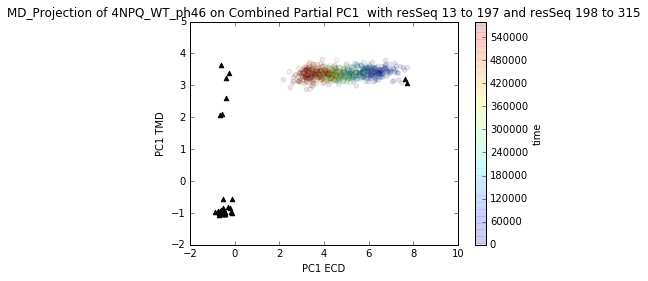

In [50]:
projection_on_combined_ppca_stand("/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_WT_pH46/4NPQ_WT_pH46_md1.skip10.ca.xtc"
                              ,"/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_WT_pH46/4NPQ_WT_pH46_md1.ca.gro"
                              ,28
                             ,"4NPQ_WT_ph46")

[0.75145115]
[0.78432452]


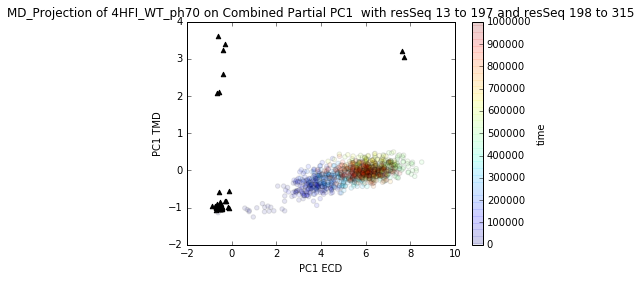

In [51]:
projection_on_combined_ppca_stand("/media/scottzhuang/data/MD/nethome_snow/Analysis/4HFI_WT_pH70/4HFI_WT_pH70_md1.skip10.ca.xtc"
                              ,"/media/scottzhuang/data/MD/nethome_snow/Analysis/4HFI_WT_pH70/4HFI_WT_pH70_md1.ca.gro"
                              ,18
                             ,"4HFI_WT_ph70")

[0.75145115]
[0.78432452]


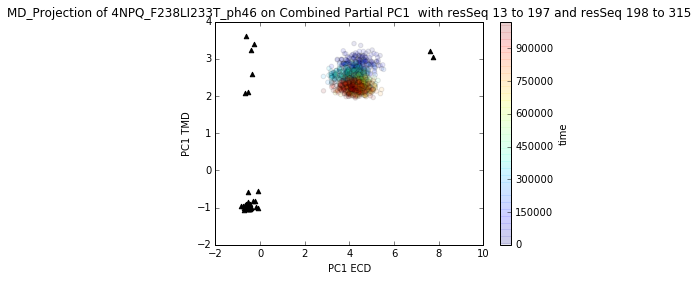

In [52]:
projection_on_combined_ppca_stand("/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_233_238_mut_pH46/4NPQ_233_238_mut_pH46_md1.skip10.ca.xtc"
                              ,"/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_233_238_mut_pH46/4NPQ_233_238_mut_pH46_md1.ca.gro"
                              ,28
                             ,"4NPQ_F238LI233T_ph46")

[0.75145115]
[0.78432452]


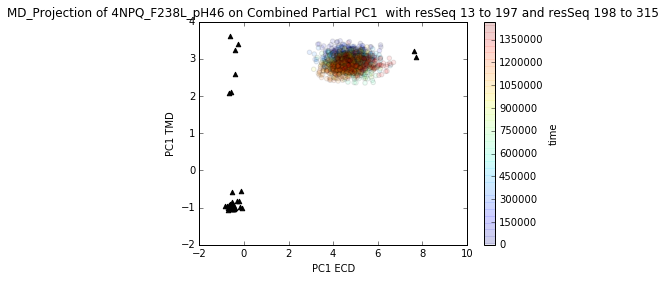

In [53]:
projection_on_combined_ppca_stand("/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_F238L_pH46/4NPQ_F238L_pH46_md1.skip10.ca.xtc"
                              ,"/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_F238L_pH46/4NPQ_F238L_pH46_md1.ca.gro"
                              ,28
                             ,"4NPQ_F238L_pH46")

[0.75145115]
[0.78432452]


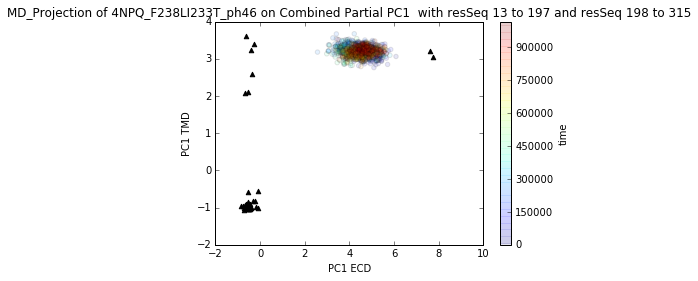

In [54]:
projection_on_combined_ppca_stand("/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_233_238_mut_pH46_2/4NPQ_233_238_mut_pH46_md2.skip10.ca.xtc"
                              ,"/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_233_238_mut_pH46_2/4NPQ_233_238_mut_pH46_md2.ca.gro"
                              ,28
                             ,"4NPQ_F238LI233T_ph46")

[0.75145115]
[0.78432452]


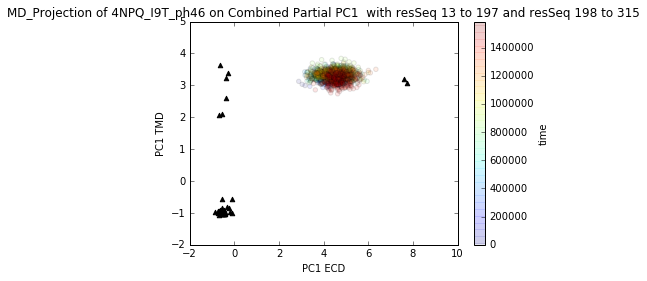

In [55]:
projection_on_combined_ppca_stand("/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_I9T_pH46/4NPQ_I9T_pH46_md1.skip10.ca.xtc"
                              ,"/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_I9T_pH46/4NPQ_I9T_pH46_md1.ca.gro"
                              ,28
                             ,"4NPQ_I9T_ph46")

[0.75145115]
[0.78432452]


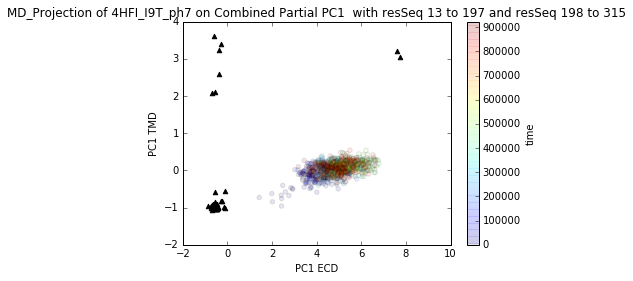

In [56]:
projection_on_combined_ppca_stand("/media/scottzhuang/data/MD/nethome_snow/Analysis/4HFI_I9T_pH7/4HFI_I9T_pH7_md1.skip10.ca.xtc"
                              ,"/media/scottzhuang/data/MD/nethome_snow/Analysis/4HFI_I9T_pH7/4HFI_I9T_pH7_md1.ca.gro"
                              ,18
                             ,"4HFI_I9T_ph7")

[0.75145115]
[0.78432452]


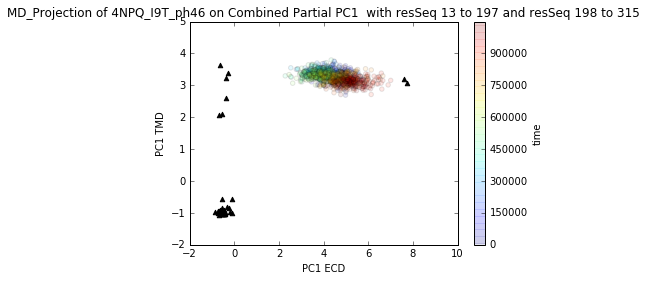

In [57]:
projection_on_combined_ppca_stand("/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_I9T_pH46_2/4NPQ_I9T_pH46_md2.skip10.ca.xtc"
                              ,"/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_I9T_pH46_2/4NPQ_I9T_pH46_md2.ca.gro"
                              ,28
                             ,"4NPQ_I9T_ph46")

[0.75145115]
[0.78432452]


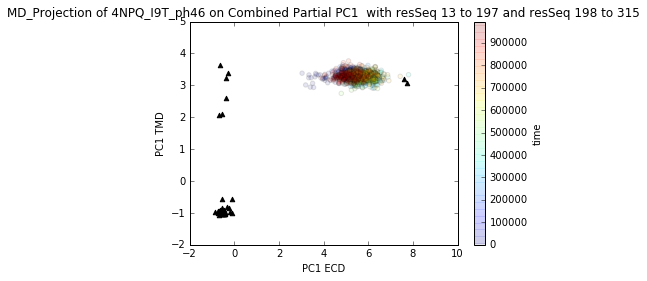

In [58]:
projection_on_combined_ppca_stand("/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_I9T_pH46_3/4NPQ_I9T_pH46_md3.skip10.ca.xtc"
                              ,"/media/scottzhuang/data/MD/nethome_snow/Analysis/4NPQ_I9T_pH46_3/4NPQ_I9T_pH46_md3.ca.gro"
                              ,28
                             ,"4NPQ_I9T_ph46")

In [5]:
import mdtraj as md
selection = 'all'
selection_dic = {'ecd':' and resSeq 5 to 192',
             'tmd': ' and resSeq 192 to 315',
             'all':' '}
traj = md.load("/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/new_ensemble.pdb")
topology = wholetraj.topology
traj0 = traj.atom_slice(topology.select('(chainid 0)' + selection_dic[selection]))
traj1 = traj.atom_slice(topology.select('(chainid 1)' + selection_dic[selection]))
traj2 = traj.atom_slice(topology.select('(chainid 2)' + selection_dic[selection]))
traj3 = traj.atom_slice(topology.select('(chainid 3)' + selection_dic[selection]))
traj4 = traj.atom_slice(topology.select('(chainid 4)' + selection_dic[selection])) 
traj4.superpose(traj0,0)
traj0.superpose(traj0,0)
traj1.superpose(traj0,0)
traj2.superpose(traj0,0)
traj3.superpose(traj0,0)
traj0.join(traj1.join(traj2.join(traj3.join(traj4))))
traj0.save_pdb('/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/' + selection + '_intersubunit_0.pdb')
traj1.save_pdb('/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/' + selection + '_intersubunit_1.pdb')
traj2.save_pdb('/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/' + selection + '_intersubunit_2.pdb')
traj3.save_pdb('/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/' + selection + '_intersubunit_3.pdb')
traj4.save_pdb('/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/' + selection + '_intersubunit_4.pdb')


In [37]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import MDAnalysis as mda
from statistics import mode
import ast
import msmexplorer as msme
from msmbuilder.utils import load,dump
import itertools
from msmbuilder.featurizer import ContactFeaturizer
from msmbuilder.featurizer import DihedralFeaturizer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
#XRD Ensemble
#28 4NPQ
#18 4HFI

In [53]:
def combined_ppca_reduced_cartesian():
    tmdtraj = md.load('/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/ensemble_subunit_tmd.pdb')
    ecdtraj = md.load('/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/ensemble_subunit_ecd.pdb')
    ppca_ecd = PCA(n_components=2)
    ppca_tmd = PCA(n_components=2)
    partial_reduced_cartesian = [ppca_ecd.fit_transform(ecdtraj.xyz.reshape(ecdtraj.n_frames, ecdtraj.n_atoms * 3)), ppca_tmd.fit_transform(tmdtraj.xyz.reshape(tmdtraj.n_frames, tmdtraj.n_atoms * 3))]    
    print(ppca_ecd.explained_variance_ratio_)
    print(ppca_tmd.explained_variance_ratio_)
    return partial_reduced_cartesian, ecdtraj, tmdtraj,ppca_ecd,ppca_tmd
partial_reduced_cartesian, wholetraj_sliced_ecd,wholetraj_sliced_tmd, ppca_ecd,ppca_tmd = combined_ppca_reduced_cartesian()


[ 0.53211844  0.21386905]
[ 0.67002475  0.20237753]


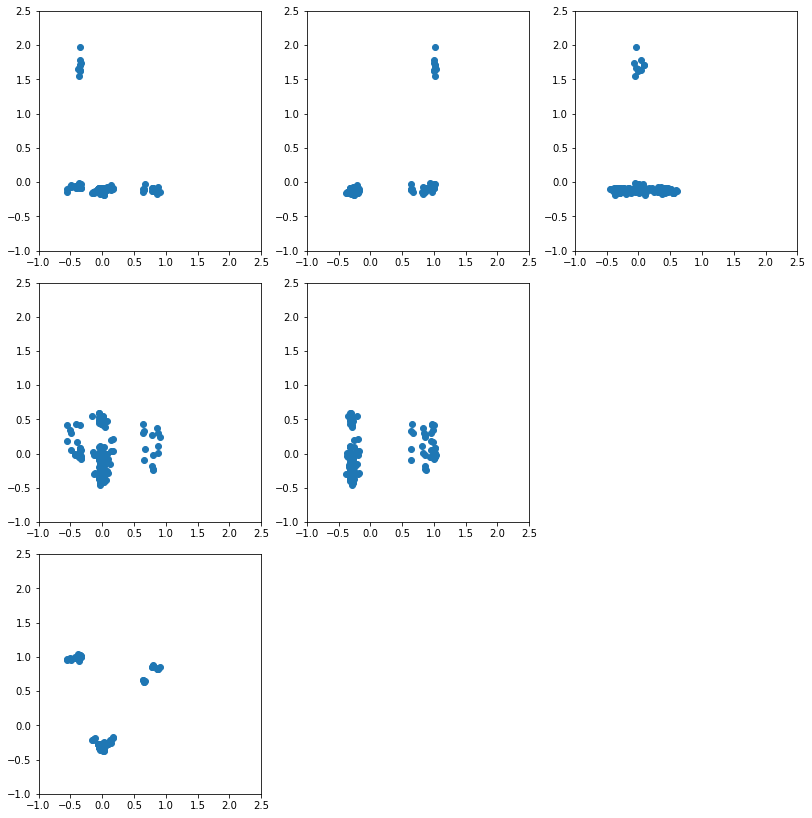

In [96]:
fig,ax = plt.subplots(4,4,figsize=(15, 15))
ax[0,3].remove()
ax[1,3].remove()
ax[2,3].remove()
ax[3,3].remove()
ax[0,2].scatter(np.asarray(partial_reduced_cartesian)[0].T[1],np.asarray(partial_reduced_cartesian)[0].T[0])
ax[1,2].remove()
ax[2,2].remove()
ax[3,2].remove()
ax[0,1].scatter(np.asarray(partial_reduced_cartesian)[1].T[0],np.asarray(partial_reduced_cartesian)[0].T[0])
ax[1,1].scatter(np.asarray(partial_reduced_cartesian)[1].T[0],np.asarray(partial_reduced_cartesian)[0].T[1])
ax[2,1].remove()
ax[3,1].remove()
ax[0,0].scatter(np.asarray(partial_reduced_cartesian)[1].T[1],np.asarray(partial_reduced_cartesian)[0].T[0])
ax[1,0].scatter(np.asarray(partial_reduced_cartesian)[1].T[1],np.asarray(partial_reduced_cartesian)[0].T[1])
ax[2,0].scatter(np.asarray(partial_reduced_cartesian)[1].T[1],np.asarray(partial_reduced_cartesian)[1].T[0])
ax[3,0].remove()
for i in range(0,4):
    for j in range(0,4):
        ax[i,j].set_xlim(-1,2.5)
        ax[i,j].set_ylim(-1,2.5)

plt.tight_layout()

In [76]:
from sklearn.cluster import KMeans
Cluster = KMeans(n_clusters=10, random_state=10)

In [80]:
Cluster.fit(np.asarray([partial_reduced_cartesian[0].T[0],partial_reduced_cartesian[0].T[1],partial_reduced_cartesian[1].T[0],partial_reduced_cartesian[1].T[1]]).T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [82]:
labels = Cluster.labels_

In [86]:
dataframe = pd.DataFrame(columns=['ecd1','ecd2','tmd1','tmd2'])

In [88]:
dataframe['ecd1'] = partial_reduced_cartesian[0].T[0]
dataframe['ecd2'] = partial_reduced_cartesian[0].T[1]
dataframe['tmd1'] = partial_reduced_cartesian[1].T[0]
dataframe['tmd2'] = partial_reduced_cartesian[1].T[0]

In [91]:
dataframe['label'] = labels

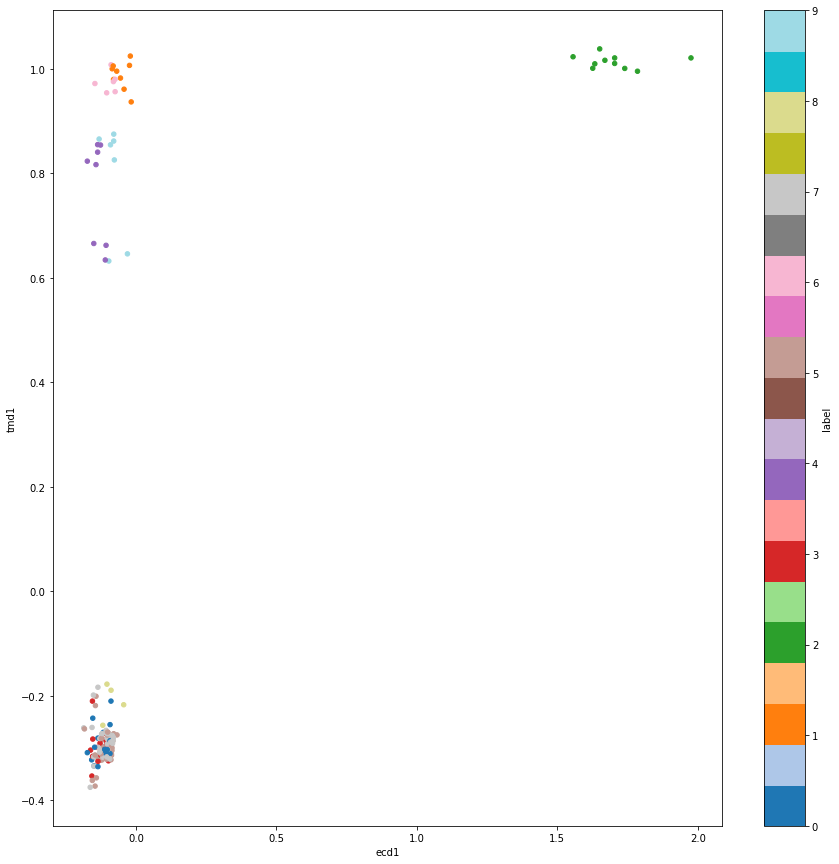

In [99]:
fig,ax = plt.subplots(figsize=(15, 15))
dataframe.plot(kind='scatter',x='ecd1',y='tmd1',c='label',colormap='Vega20',ax=ax)

In [107]:
default_location = '/home/scottzhuang/pdc/'
default_skip = 10

In [109]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md4',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3','5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5','4HFI_F238A_pH46_md1','4HFI_F238A_pH46_md2','4HFI_F238A_pH46_md3','4HFI_F238L_pH46_md4']

In [101]:
def create_md_dataframe():    
    md_data = pd.DataFrame(columns=list(['MD_name','pH','replicate','subunit','traj_time']))
    return md_data

In [102]:
def create_metadata(md_data= None):   
    def append_metadata(traj_note, location = default_location, skip = default_skip, md_data = md_data):
        if traj_note.find('ethanol') >= 0:
            skip = skip * 2
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top= location + top_location)
        print("In " + traj_note + ", simulation runs " + str(skip * traj.n_frames) + " ns.")
        md_name = traj_note[:traj_note.find('pH')-1]
        pH = traj_note[traj_note.find('pH')+2:traj_note.find('pH')+4]
        md_replicate = traj_note[-1]
        for i in range(0,traj.n_frames):
            for subunit in range(0,5):
                md_data.loc[md_data.shape[0]+1] = [md_name,pH,md_replicate,subunit,i]

    for traj_note in traj_notes:
        append_metadata(traj_note)

In [127]:
def create_system_notation(md_data = None):
    system_notation = 0
    notation = -1
    location = default_location
    skip= default_skip

    notations = []
    increment = 0
    for traj_note in traj_notes:
        if traj_note.find('ethanol') >= 0:
            top_location = traj_note + '/' + traj_note + ".ca.gro"
            traj_location = traj_note + '/' + traj_note + ".skip" + str(skip*2) + ".ca.xtc"
        else:
            top_location = traj_note + '/' + traj_note + ".ca.gro"
            traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top= location + top_location)
        if traj_note.find('md1') >= 0:
            notation = notation + 1
        if traj_note == '5NJY_I233T_pH70_md4' or traj_note == '4NPQ_pH70_md5' or  traj_note == '4NPQ_F238L_pH70_md3' or traj_note == '4NPQ_I233T_pH70_md3' or traj_note == '4NPQ_F238LI233T_pH70_md3' or traj_note == '4HFI_F238L_pH46_md4':
            notation = notation + 1

        for frame in range(0,traj.n_frames):
            for subunit in range(0,5):
                notations.append(notation)
        #if increment % 3 == 2:
        #    notation = notation + 1
        #increment = increment + 1 
    md_data['system'] = notations

In [118]:
def create_cppca_data(md_data = None): 
    def append_projection_on_combined_ppca_data(traj_note, subunit, location = default_location, skip = default_skip, residue_selection_1 = "resSeq 8 to 192", residue_selection_2 = "resSeq 192 to 315"):
        if traj_note.find('ethanol') >= 0:
            skip = skip * 2
        top_location = traj_note + '/' + traj_note + ".ca.pdb"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top= location + top_location)
        topology = traj.topology
        traj_sliced_ecd = traj.atom_slice(topology.select(residue_selection_1 + 'and chainid ' + str(subunit) ))
        traj_sliced_tmd = traj.atom_slice(topology.select(residue_selection_2 + 'and chainid ' + str(subunit) ))

        traj_sliced_ecd.superpose(wholetraj_sliced_ecd,0)
        traj_sliced_tmd.superpose(wholetraj_sliced_tmd,0)

        reduced_cartesian_ecd_pc1.extend(ppca_ecd.transform(traj_sliced_ecd.xyz.reshape(traj_sliced_ecd.n_frames, traj_sliced_ecd.n_atoms * 3)).T[0])
        reduced_cartesian_ecd_pc2.extend(ppca_ecd.transform(traj_sliced_ecd.xyz.reshape(traj_sliced_ecd.n_frames, traj_sliced_ecd.n_atoms * 3)).T[1])
        reduced_cartesian_tmd_pc1.extend(ppca_tmd.transform(traj_sliced_tmd.xyz.reshape(traj_sliced_tmd.n_frames, traj_sliced_tmd.n_atoms * 3)).T[0])
        reduced_cartesian_tmd_pc2.extend(ppca_tmd.transform(traj_sliced_tmd.xyz.reshape(traj_sliced_tmd.n_frames, traj_sliced_tmd.n_atoms * 3)).T[1])
        
    reduced_cartesian_ecd_pc1 = []
    reduced_cartesian_ecd_pc2 = []
    reduced_cartesian_tmd_pc1 = []
    reduced_cartesian_tmd_pc2 = []

    for traj_note in traj_notes:
        for subunit in range(0,5):
            append_projection_on_combined_ppca_data(traj_note,subunit)
    md_data['ecd_pc1']= reduced_cartesian_ecd_pc1
    md_data['ecd_pc2']= reduced_cartesian_ecd_pc2
    md_data['tmd_pc1']= reduced_cartesian_tmd_pc1
    md_data['tmd_pc2']= reduced_cartesian_tmd_pc2

In [110]:
md_data = create_md_dataframe()
create_metadata(md_data)


In 5NJY_pH70_md1, simulation runs 1360 ns.
In 5NJY_pH70_md2, simulation runs 750 ns.
In 5NJY_pH70_md3, simulation runs 810 ns.
In 5NJY_F238L_pH70_md1, simulation runs 850 ns.
In 5NJY_F238L_pH70_md2, simulation runs 1220 ns.
In 5NJY_F238L_pH70_md3, simulation runs 720 ns.
In 5NJY_I233T_pH70_md4, simulation runs 860 ns.
In 5NJY_I233T_pH70_md2, simulation runs 910 ns.
In 5NJY_I233T_pH70_md3, simulation runs 820 ns.
In 5NJY_F238LI233T_pH70_md1, simulation runs 830 ns.
In 5NJY_F238LI233T_pH70_md2, simulation runs 800 ns.
In 5NJY_F238LI233T_pH70_md3, simulation runs 880 ns.
In 5NJY_pH46_md1, simulation runs 1080 ns.
In 5NJY_pH46_md2, simulation runs 1060 ns.
In 5NJY_pH46_md3, simulation runs 1030 ns.
In 5NJY_F238L_pH46_md1, simulation runs 930 ns.
In 5NJY_F238L_pH46_md2, simulation runs 950 ns.
In 5NJY_F238L_pH46_md3, simulation runs 1090 ns.
In 5NJY_I233T_pH46_md1, simulation runs 810 ns.
In 5NJY_I233T_pH46_md2, simulation runs 870 ns.
In 5NJY_I233T_pH46_md3, simulation runs 980 ns.
In 5NJY

In [128]:
create_system_notation(md_data)

In [119]:
create_cppca_data(md_data)

In [126]:
md_data

,MD_name,pH,replicate,subunit,traj_time,system,ecd_pc1,ecd_pc2,tmd_pc1,tmd_pc2
1,5NJY,70,1,0,0,0,-0.127570,0.082841,0.904002,-0.509743
2,5NJY,70,1,1,0,0,-0.434775,0.404661,1.154695,-0.491973
3,5NJY,70,1,2,0,0,-0.105221,-0.110753,0.997334,-0.415357
4,5NJY,70,1,3,0,0,-0.136741,-0.009632,1.089465,-0.448807
5,5NJY,70,1,4,0,0,-0.109747,-0.392145,0.906093,-0.499486
6,5NJY,70,1,0,1,0,-0.472708,-0.286542,0.913324,-0.431618
7,5NJY,70,1,1,1,0,-0.034895,0.070513,0.785948,-0.485790
8,5NJY,70,1,2,1,0,-0.152131,-0.319227,0.925114,-0.420520
9,5NJY,70,1,3,1,0,-0.247974,-0.200574,1.097508,-0.576281
10,5NJY,70,1,4,1,0,-0.083856,-0.297853,1.052519,-0.486659


In [131]:
md_data['label'] = Cluster.predict(md_data[['ecd_pc1','ecd_pc2','tmd_pc1','tmd_pc2']])

In [133]:
md_data.to_pickle('glic_subunit_pca.pickle')

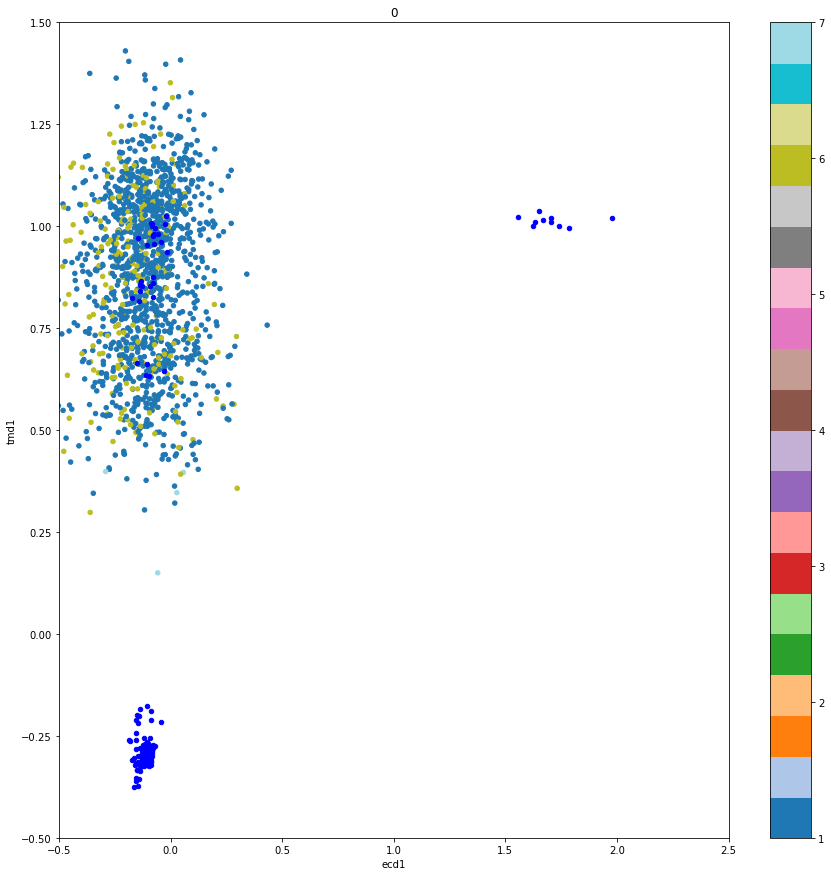

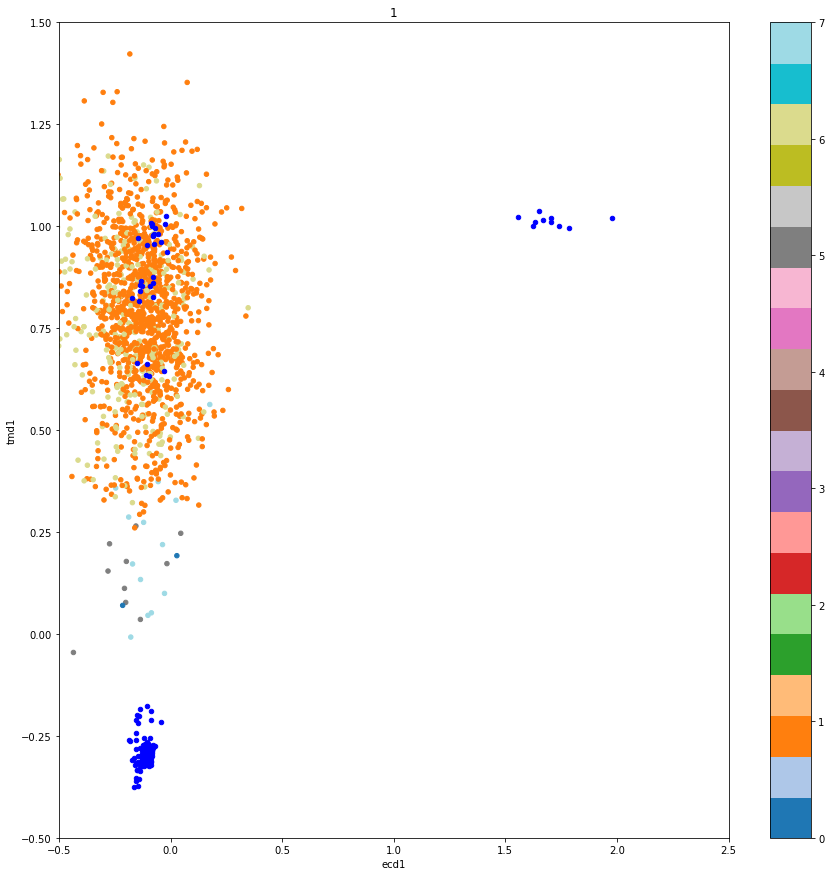

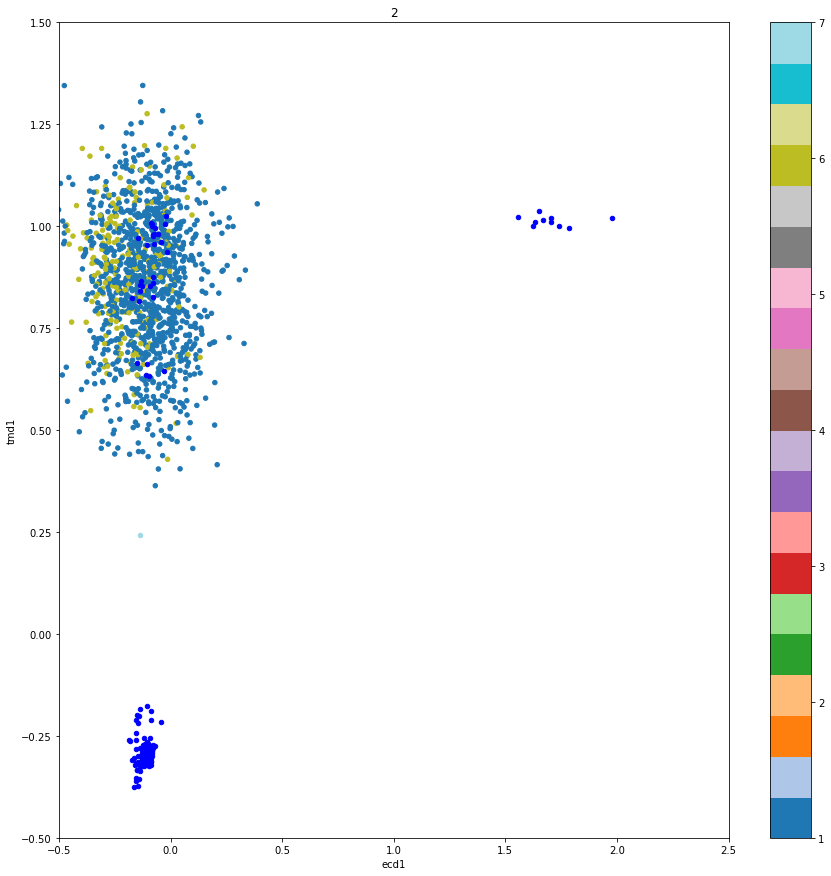

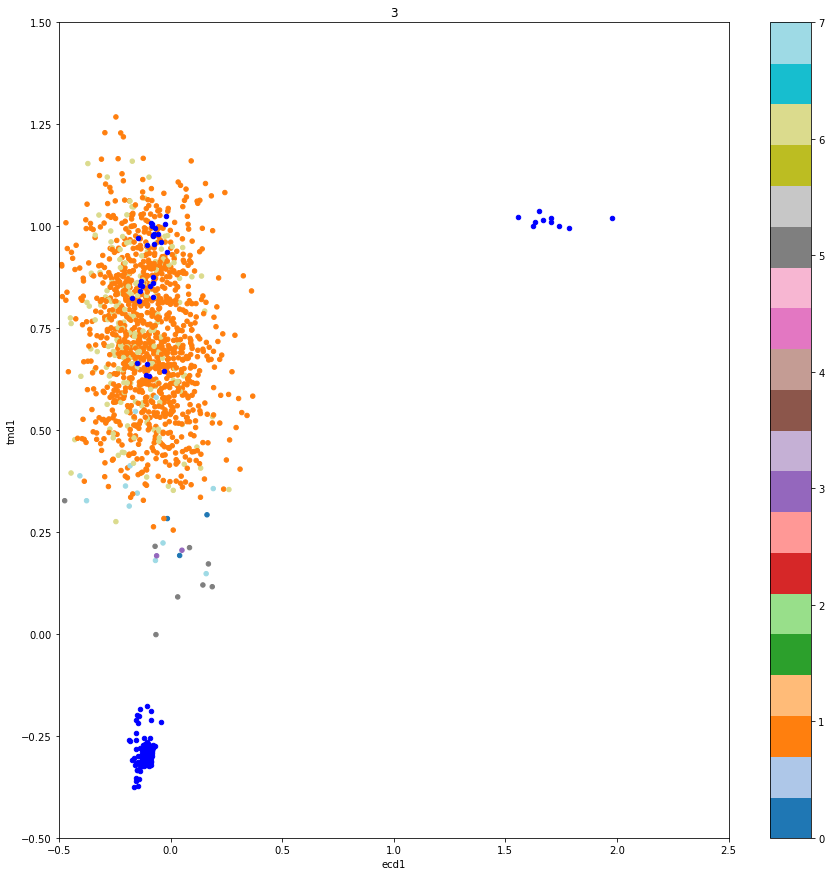

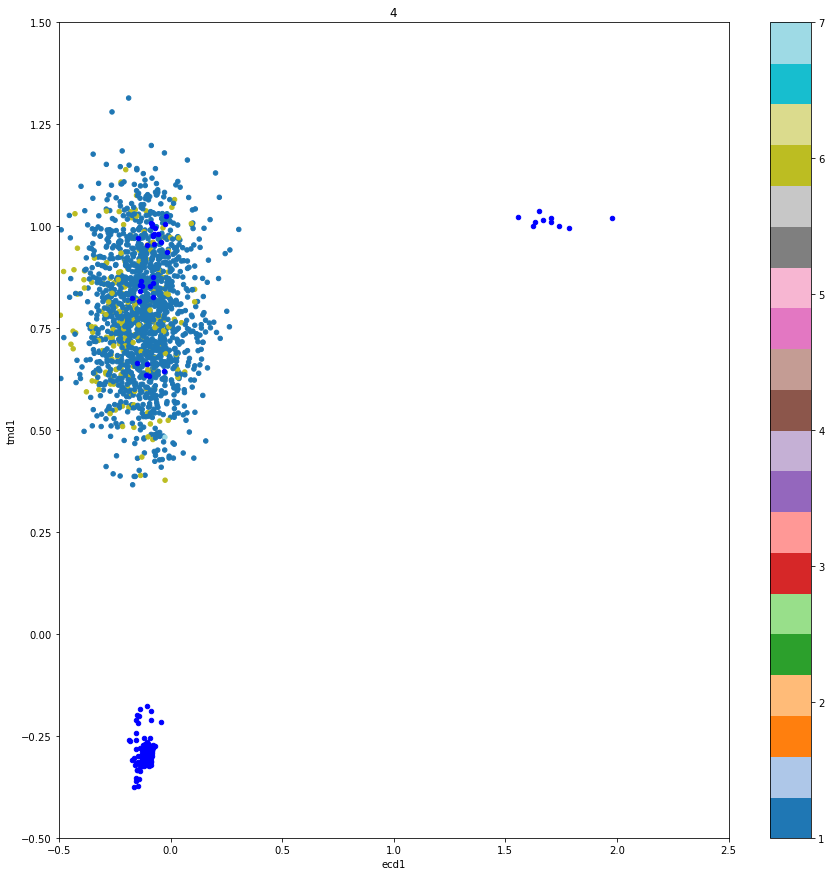

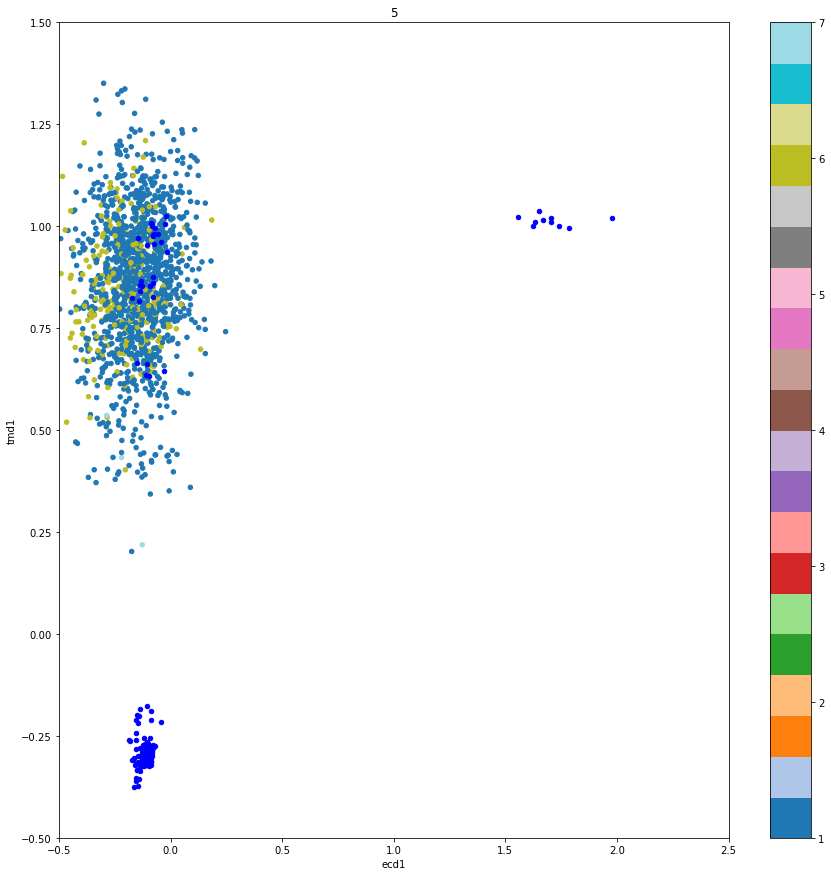

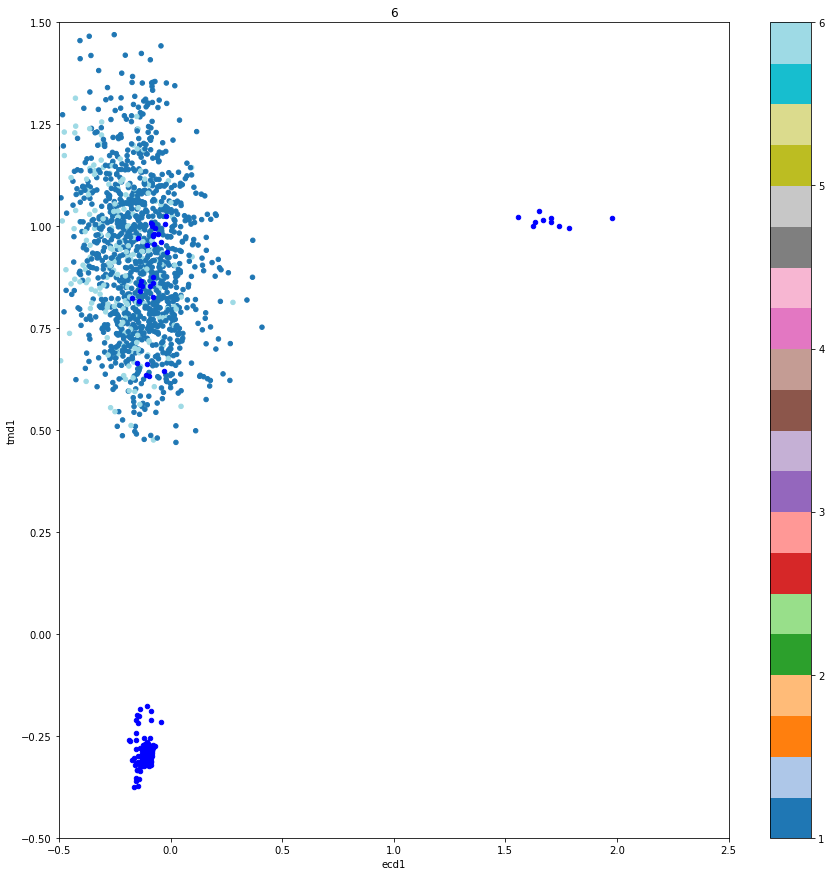

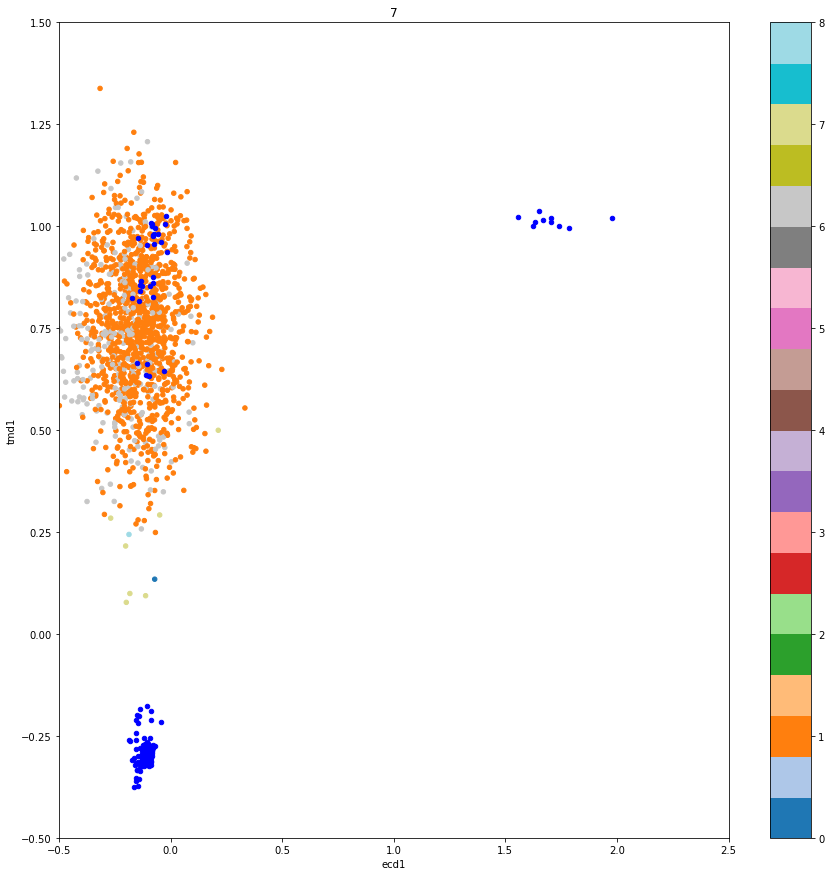

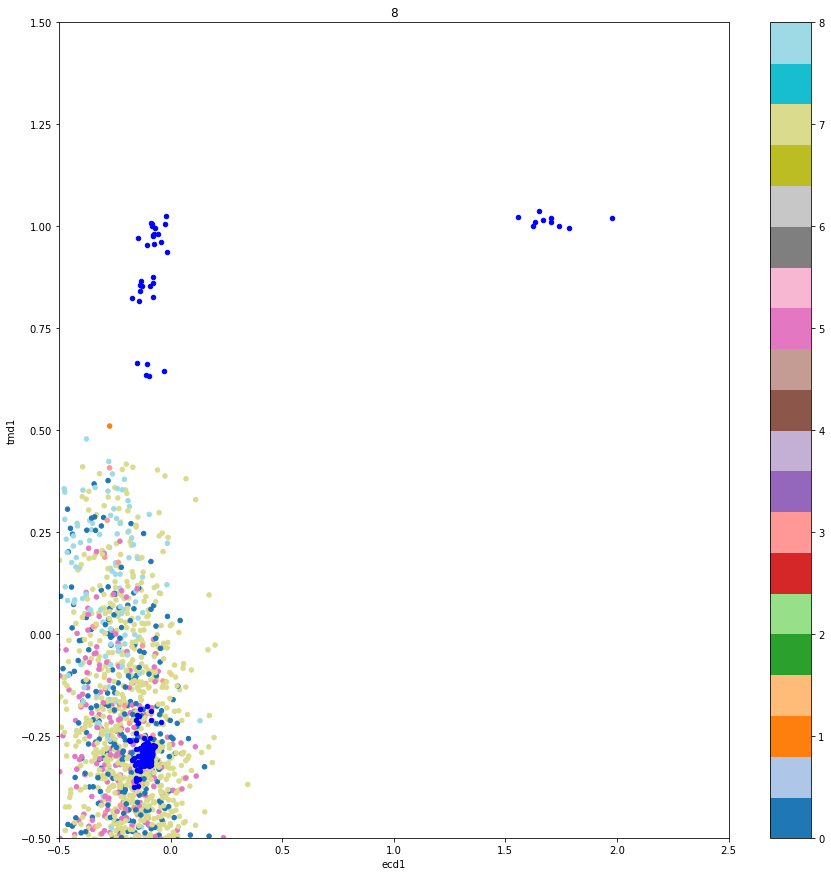

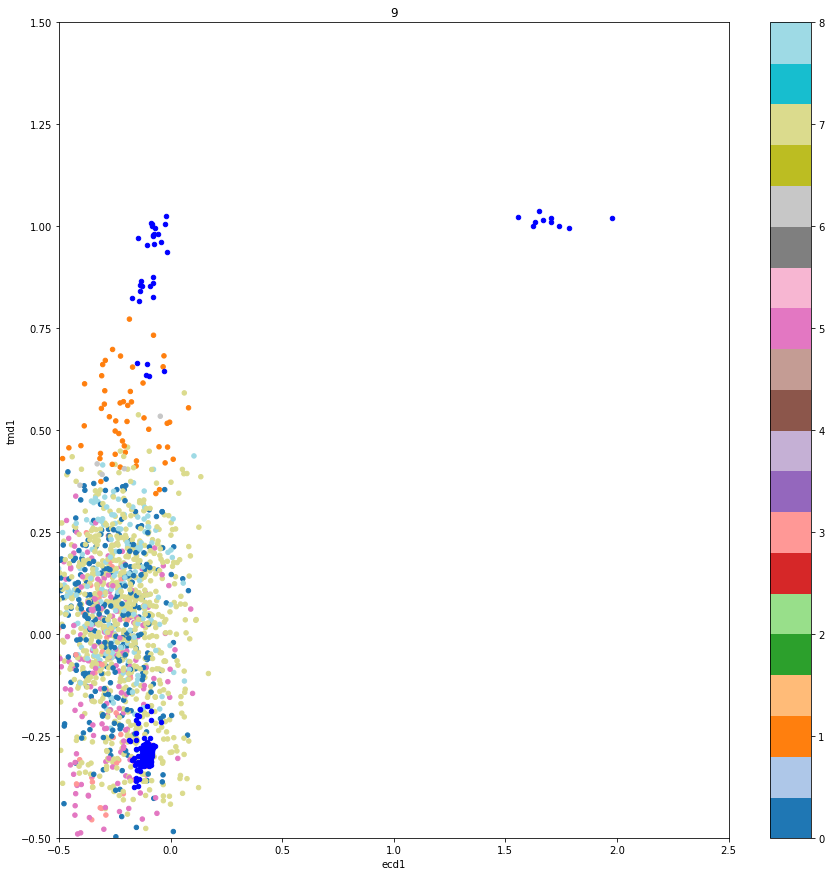

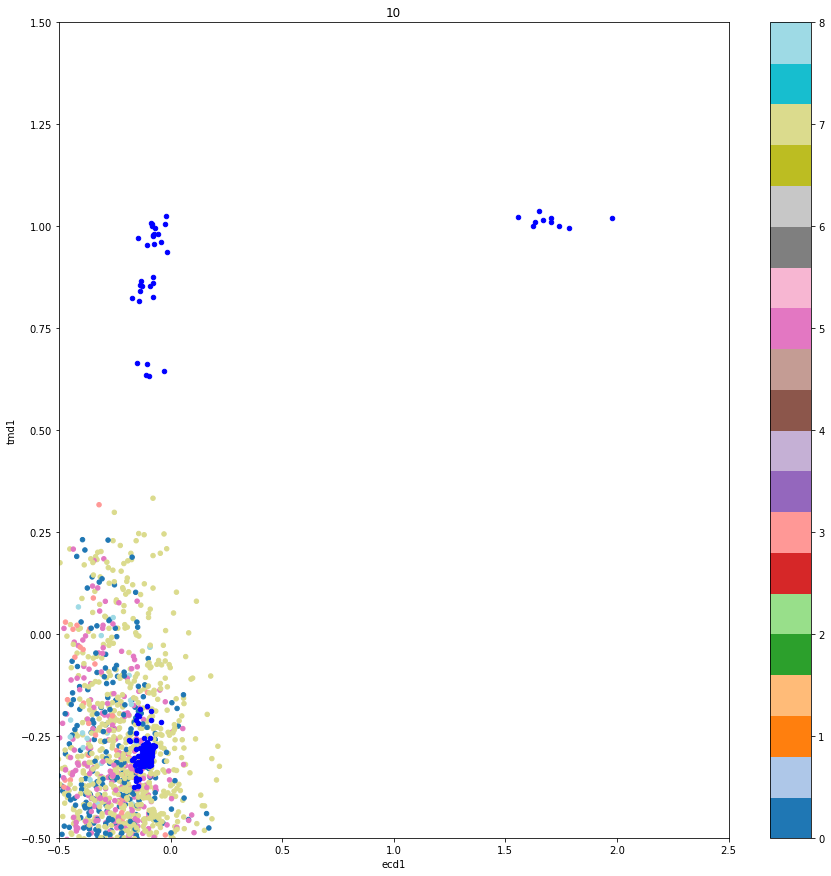

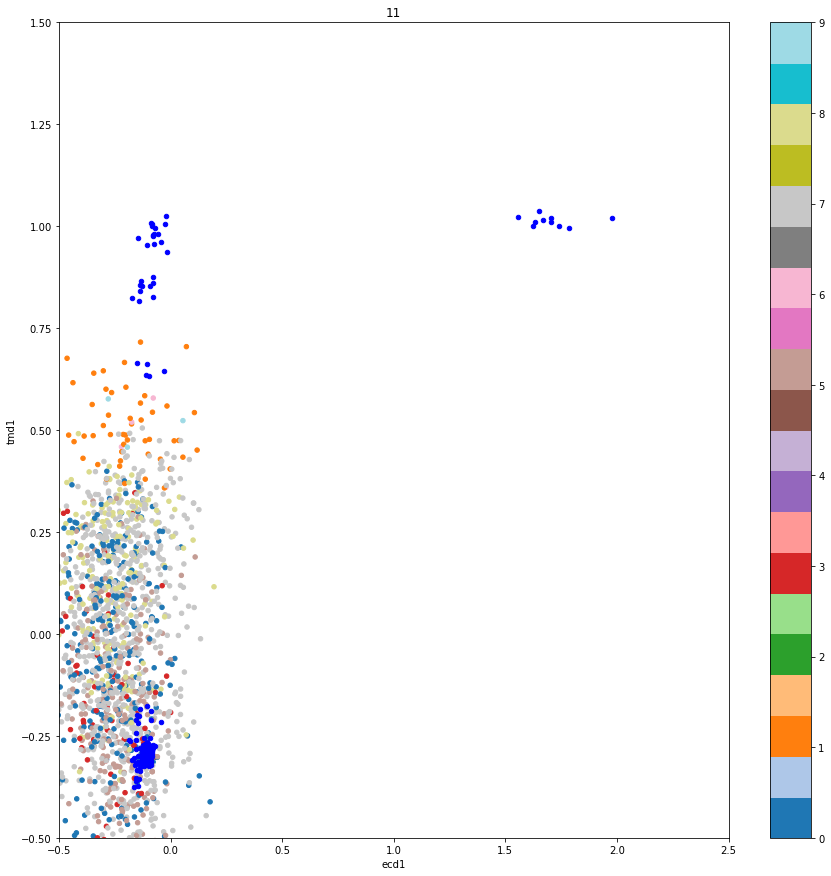

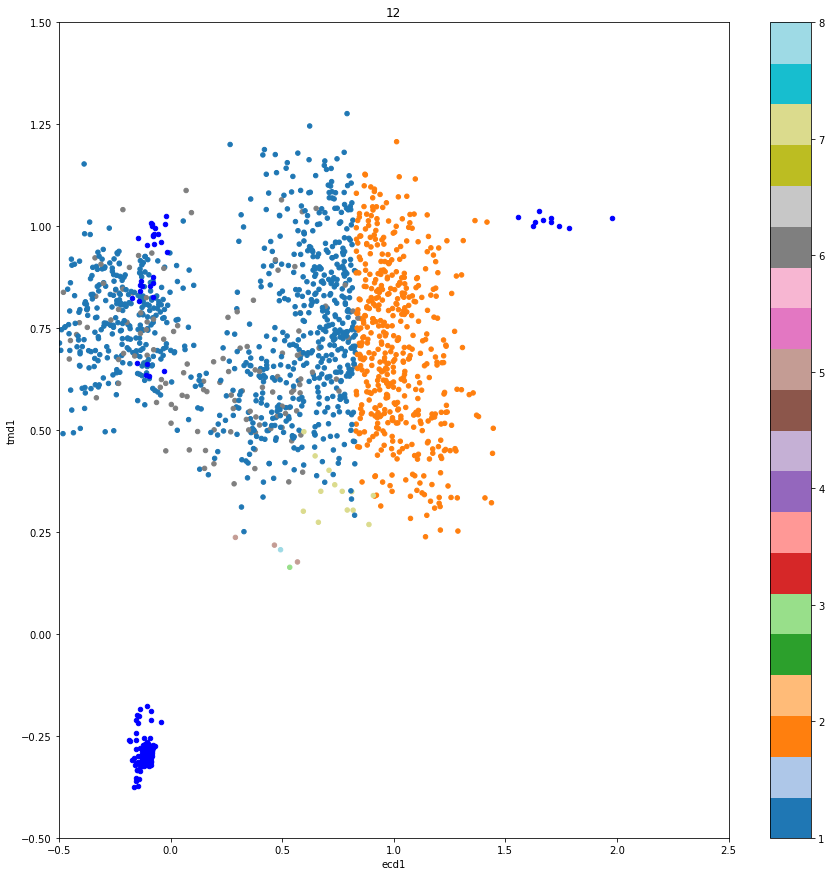

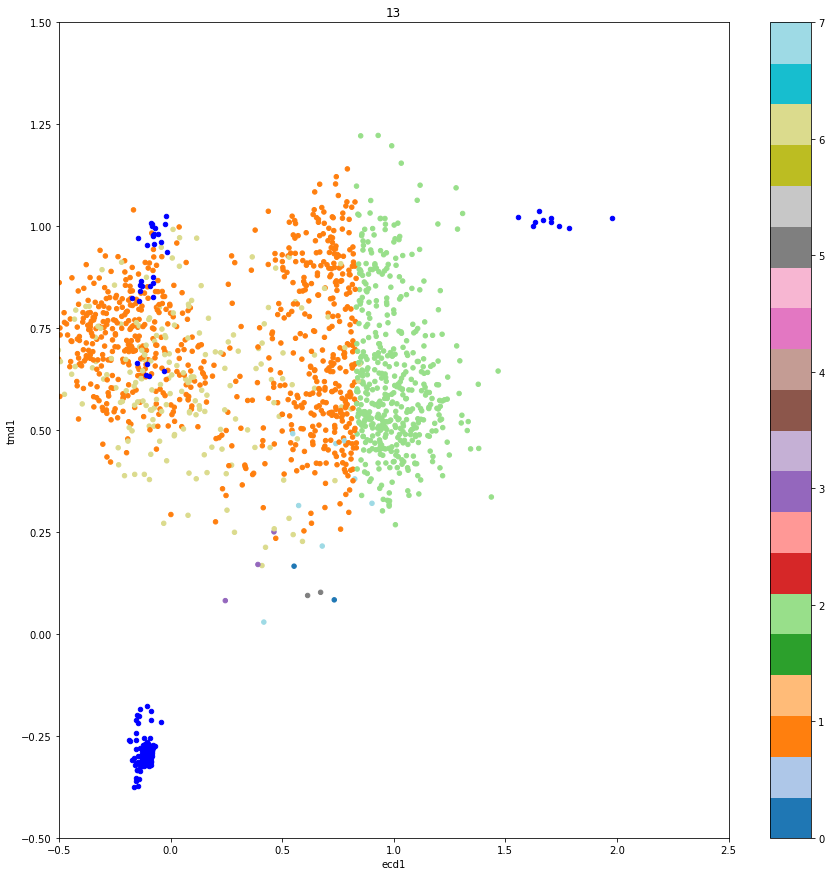

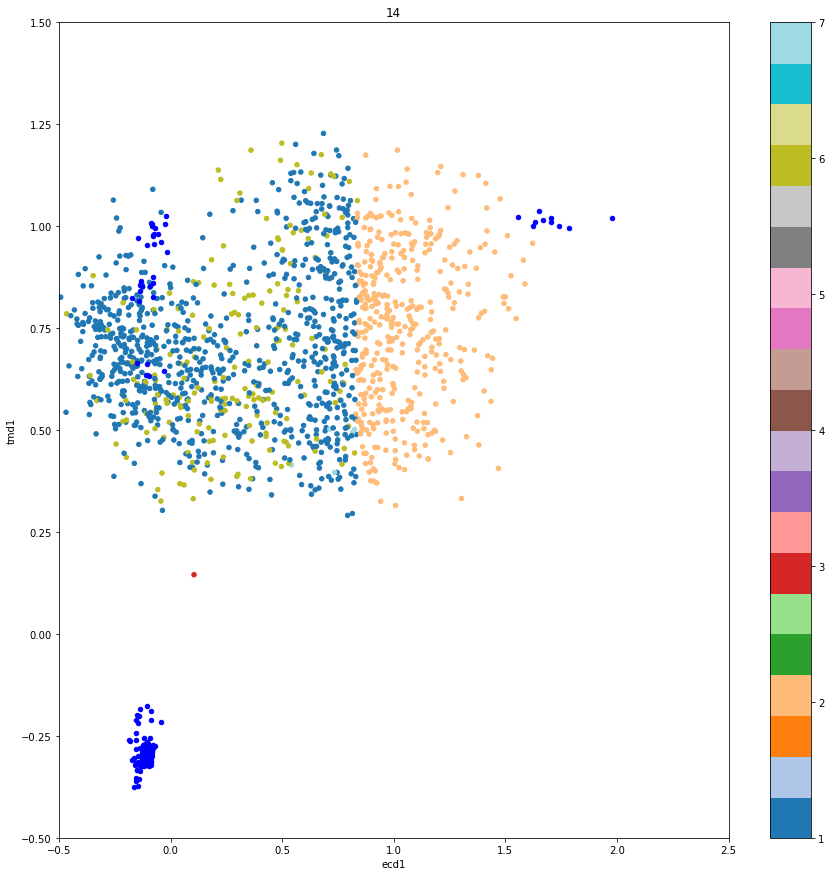

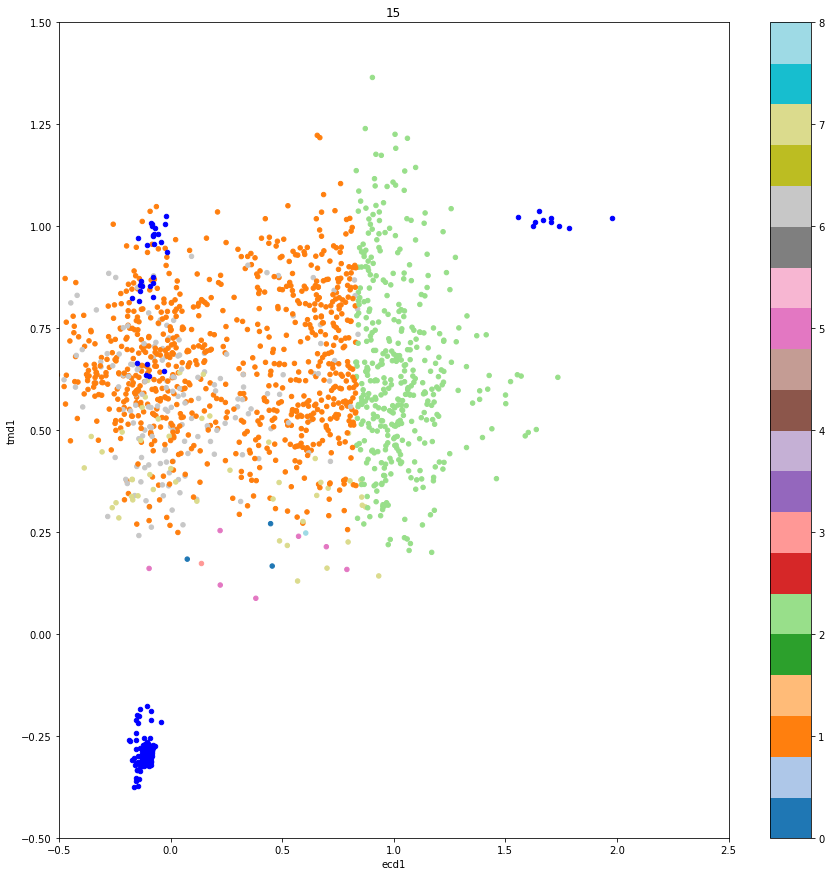

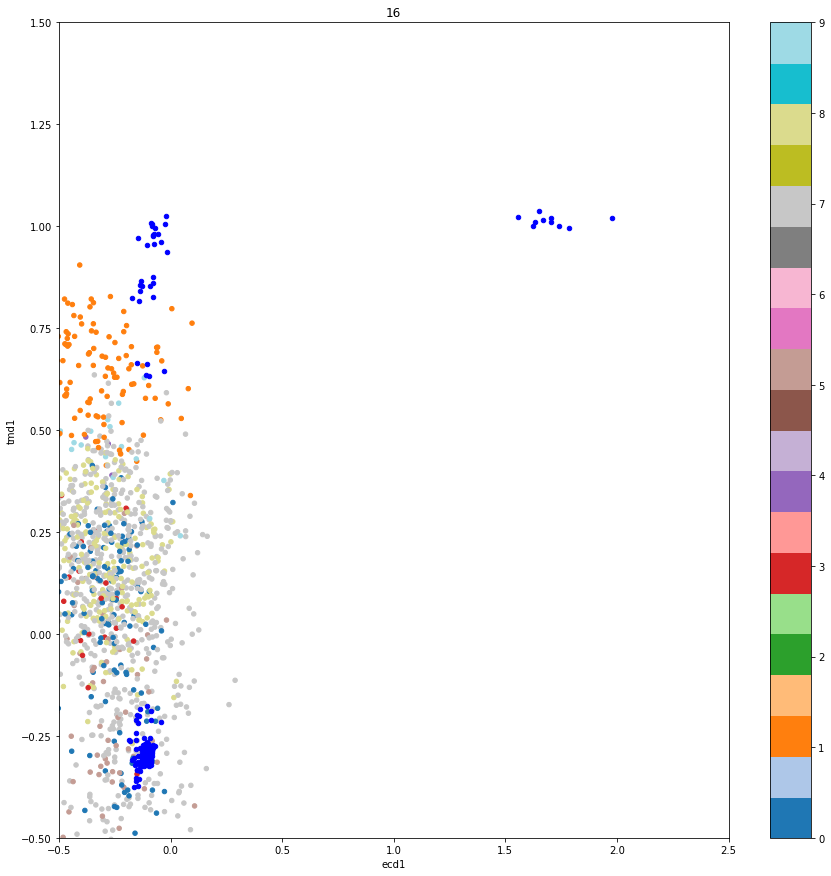

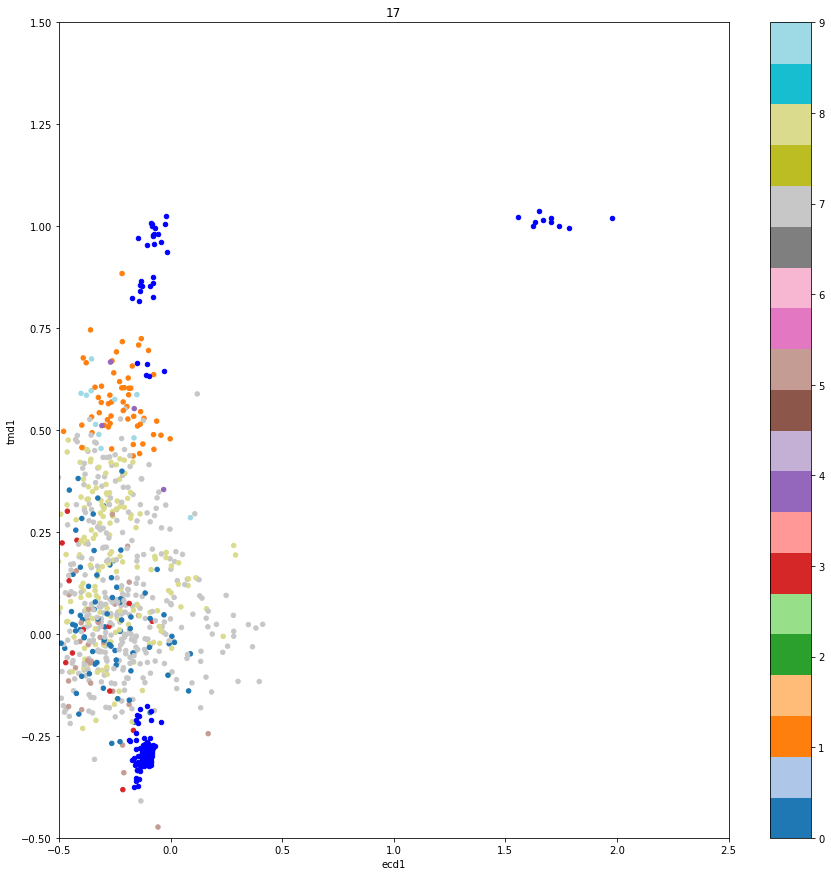

In [135]:
for system in sorted(set(md_data['system'])):
    fig,ax = plt.subplots(figsize=(15, 15))
    md_data[md_data.system == system].plot(kind='scatter',x='ecd_pc1',y='tmd_pc1',ax=ax,c=md_data[md_data.system == system]['label'],colormap='Vega20')
    dataframe.plot(kind='scatter',x='ecd1',y='tmd1',c='b',ax=ax)

    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(-0.5,1.5)
    ax.set_title(system)
    plt.show()

In [137]:
def sort_model(model):
    def rotate(nums, k):
        output = nums.copy()
        output.reverse()
        output[0:k] = reversed(output[0:k])
        output[k:] = reversed(output[k:])
        return output
    output_model = model.copy()
    if rotate(model,1) < output_model:
        output_model = rotate(model,1)
    if rotate(model,2) < output_model:
        output_model = rotate(model,2)
    if rotate(model,3) < output_model:
        output_model = rotate(model,3)
    if rotate(model,4) < output_model:
        output_model = rotate(model,4)
    model.reverse()
    if model < output_model:
        output_model = model
    if rotate(model,1) < output_model:
        output_model = rotate(model,1)
    if rotate(model,2) < output_model:
        output_model = rotate(model,2)
    if rotate(model,3) < output_model:
        output_model = rotate(model,3)
    if rotate(model,4) < output_model:
        output_model = rotate(model,4)
    return output_model

In [139]:
models = []
for i in range(0,100):
    for replicate in set(md_data[(md_data.MD_name == '4NPQ') & (md_data.pH == '70')]['replicate']):
        model = (sort_model(list(md_data[(md_data.replicate == replicate) & (md_data.MD_name == '4NPQ') & (md_data.pH == '70') & (md_data.traj_time == i)]['label'])))
        models.append(''.join(str(e) for e in model))
model_dic = {}
for model in set(models):
    model_dic[model] = models.count(model)
sorted_dic = [(v,k) for k,v in model_dic.items()]
sorted_dic.sort(reverse=True)
for v,k in sorted_dic:
    if k != '':
        if v > 5:
            print("%s: %d" % (k,v))

11111: 69
22222: 36
11116: 32
12222: 28
11112: 16
11222: 14
11166: 12
11616: 10
11212: 10
11122: 10
12122: 8


In [143]:
models = []
for i in range(0,100):
    for replicate in set(md_data[(md_data.MD_name == '4NPQ_F238L') & (md_data.pH == '70')]['replicate']):
        model = (sort_model(list(md_data[(md_data.replicate == replicate) & (md_data.MD_name == '4NPQ_F238L') & (md_data.pH == '70') & (md_data.traj_time == i)]['label'])))
        models.append(''.join(str(e) for e in model))
model_dic = {}
for model in set(models):
    model_dic[model] = models.count(model)
sorted_dic = [(v,k) for k,v in model_dic.items()]
sorted_dic.sort(reverse=True)
for v,k in sorted_dic:
    if k != '':
        if v > 5:
            print("%s: %d" % (k,v))

11111: 55
11116: 31
12222: 30
22222: 29
11222: 21
11112: 15
11122: 13
11212: 12
66666: 8
16666: 8
12122: 8
11666: 7
11616: 7
16166: 6
11166: 6


In [144]:
models = []
for i in range(0,100):
    for replicate in set(md_data[(md_data.MD_name == '4NPQ_I233T') & (md_data.pH == '70')]['replicate']):
        model = (sort_model(list(md_data[(md_data.replicate == replicate) & (md_data.MD_name == '4NPQ_I233T') & (md_data.pH == '70') & (md_data.traj_time == i)]['label'])))
        models.append(''.join(str(e) for e in model))
model_dic = {}
for model in set(models):
    model_dic[model] = models.count(model)
sorted_dic = [(v,k) for k,v in model_dic.items()]
sorted_dic.sort(reverse=True)
for v,k in sorted_dic:
    if k != '':
        if v > 5:
            print("%s: %d" % (k,v))

11111: 78
22222: 34
11116: 32
12222: 17
11112: 17
11666: 12
11166: 12
11122: 11
16166: 10
11212: 10
11222: 9
16666: 7
12122: 7
11616: 6


In [145]:
models = []
for i in range(0,100):
    for replicate in set(md_data[(md_data.MD_name == '4NPQ_F238LI233T') & (md_data.pH == '70')]['replicate']):
        model = (sort_model(list(md_data[(md_data.replicate == replicate) & (md_data.MD_name == '4NPQ_F238LI233T') & (md_data.pH == '70') & (md_data.traj_time == i)]['label'])))
        models.append(''.join(str(e) for e in model))
model_dic = {}
for model in set(models):
    model_dic[model] = models.count(model)
sorted_dic = [(v,k) for k,v in model_dic.items()]
sorted_dic.sort(reverse=True)
for v,k in sorted_dic:
    if k != '':
        if v > 5:
            print("%s: %d" % (k,v))

11111: 69
22222: 33
11116: 22
12222: 19
11112: 14
16666: 12
11222: 12
11117: 10
16166: 9
11616: 9
11166: 9
11122: 8
11212: 7
12122: 6


In [146]:
models = []
for i in range(0,100):
    for replicate in set(md_data[(md_data.MD_name == '5NJY') & (md_data.pH == '70')]['replicate']):
        model = (sort_model(list(md_data[(md_data.replicate == replicate) & (md_data.MD_name == '5NJY') & (md_data.pH == '70') & (md_data.traj_time == i)]['label'])))
        models.append(''.join(str(e) for e in model))
model_dic = {}
for model in set(models):
    model_dic[model] = models.count(model)
sorted_dic = [(v,k) for k,v in model_dic.items()]
sorted_dic.sort(reverse=True)
for v,k in sorted_dic:
    if k != '':
        if v > 5:
            print("%s: %d" % (k,v))

11111: 125
11116: 77
11166: 20
11616: 10
16166: 8
16666: 6
11666: 6


In [150]:
models = []
for i in range(0,100):
    for replicate in set(md_data[(md_data.MD_name == '5NJY') & (md_data.pH == '46')]['replicate']):
        model = (sort_model(list(md_data[(md_data.replicate == replicate) & (md_data.MD_name == '5NJY') & (md_data.pH == '46') & (md_data.traj_time == i)]['label'])))
        models.append(''.join(str(e) for e in model))
model_dic = {}
for model in set(models):
    model_dic[model] = models.count(model)
sorted_dic = [(v,k) for k,v in model_dic.items()]
sorted_dic.sort(reverse=True)
for v,k in sorted_dic:
    if k != '':
        if v > 5:
            print("%s: %d" % (k,v))

11111: 180
11116: 69
11616: 12
16166: 11
11166: 11
11666: 10


In [152]:
models = []
for i in range(0,100):
    for replicate in set(md_data[(md_data.MD_name == '5NJY_F238L') & (md_data.pH == '70')]['replicate']):
        model = (sort_model(list(md_data[(md_data.replicate == replicate) & (md_data.MD_name == '5NJY_F238L') & (md_data.pH == '70') & (md_data.traj_time == i)]['label'])))
        models.append(''.join(str(e) for e in model))
model_dic = {}
for model in set(models):
    model_dic[model] = models.count(model)
sorted_dic = [(v,k) for k,v in model_dic.items()]
sorted_dic.sort(reverse=True)
for v,k in sorted_dic:
    if k != '':
        if v > 5:
            print("%s: %d" % (k,v))

11111: 108
11116: 66
11616: 23
11166: 18
16666: 12
16166: 10
11666: 8


In [153]:
models = []
for i in range(0,100):
    for replicate in set(md_data[(md_data.MD_name == '5NJY_F238L') & (md_data.pH == '46')]['replicate']):
        model = (sort_model(list(md_data[(md_data.replicate == replicate) & (md_data.MD_name == '5NJY_F238L') & (md_data.pH == '46') & (md_data.traj_time == i)]['label'])))
        models.append(''.join(str(e) for e in model))
model_dic = {}
for model in set(models):
    model_dic[model] = models.count(model)
sorted_dic = [(v,k) for k,v in model_dic.items()]
sorted_dic.sort(reverse=True)
for v,k in sorted_dic:
    if k != '':
        if v > 5:
            print("%s: %d" % (k,v))

11111: 163
11116: 70
11616: 17
11166: 15
11666: 9


In [157]:
models = []
for i in range(0,100):
    for replicate in set(md_data[(md_data.MD_name == '5NJY_I233T') & (md_data.pH == '70')]['replicate']):
        model = (sort_model(list(md_data[(md_data.replicate == replicate) & (md_data.MD_name == '5NJY_I233T') & (md_data.pH == '70') & (md_data.traj_time == i)]['label'])))
        models.append(''.join(str(e) for e in model))
model_dic = {}
for model in set(models):
    model_dic[model] = models.count(model)
sorted_dic = [(v,k) for k,v in model_dic.items()]
sorted_dic.sort(reverse=True)
for v,k in sorted_dic:
    if k != '':
        if v > 5:
            print("%s: %d" % (k,v))

11111: 140
11116: 73
11616: 12
11166: 10
16666: 8
66666: 7


In [156]:
models = []
for i in range(0,100):
    for replicate in set(md_data[(md_data.MD_name == '5NJY_I233T') & (md_data.pH == '46')]['replicate']):
        model = (sort_model(list(md_data[(md_data.replicate == replicate) & (md_data.MD_name == '5NJY_I233T') & (md_data.pH == '46') & (md_data.traj_time == i)]['label'])))
        models.append(''.join(str(e) for e in model))
model_dic = {}
for model in set(models):
    model_dic[model] = models.count(model)
sorted_dic = [(v,k) for k,v in model_dic.items()]
sorted_dic.sort(reverse=True)
for v,k in sorted_dic:
    if k != '':
        if v > 5:
            print("%s: %d" % (k,v))

11111: 144
11116: 68
11166: 16
16166: 9
11616: 8
66666: 7
16666: 7
11666: 7


In [154]:
models = []
for i in range(0,100):
    for replicate in set(md_data[(md_data.MD_name == '5NJY_F238LI233T') & (md_data.pH == '70')]['replicate']):
        model = (sort_model(list(md_data[(md_data.replicate == replicate) & (md_data.MD_name == '5NJY_F238LI233T') & (md_data.pH == '70') & (md_data.traj_time == i)]['label'])))
        models.append(''.join(str(e) for e in model))
model_dic = {}
for model in set(models):
    model_dic[model] = models.count(model)
sorted_dic = [(v,k) for k,v in model_dic.items()]
sorted_dic.sort(reverse=True)
for v,k in sorted_dic:
    if k != '':
        if v > 5:
            print("%s: %d" % (k,v))

11111: 108
11116: 80
11616: 17
11166: 16
16166: 7
11666: 7


In [155]:
models = []
for i in range(0,100):
    for replicate in set(md_data[(md_data.MD_name == '5NJY_F238LI233T') & (md_data.pH == '46')]['replicate']):
        model = (sort_model(list(md_data[(md_data.replicate == replicate) & (md_data.MD_name == '5NJY_F238LI233T') & (md_data.pH == '46') & (md_data.traj_time == i)]['label'])))
        models.append(''.join(str(e) for e in model))
model_dic = {}
for model in set(models):
    model_dic[model] = models.count(model)
sorted_dic = [(v,k) for k,v in model_dic.items()]
sorted_dic.sort(reverse=True)
for v,k in sorted_dic:
    if k != '':
        if v > 5:
            print("%s: %d" % (k,v))

11111: 145
11116: 66
11616: 15
16666: 14
66666: 10
16166: 7
11166: 6


In [140]:
models = []
for i in range(0,100):
    for replicate in set(md_data[(md_data.MD_name == '4HFI') & (md_data.pH == '46')]['replicate']):
        model = (sort_model(list(md_data[(md_data.replicate == replicate) & (md_data.MD_name == '4HFI') & (md_data.pH == '46') & (md_data.traj_time == i)]['label'])))
        models.append(''.join(str(e) for e in model))
model_dic = {}
for model in set(models):
    model_dic[model] = models.count(model)
sorted_dic = [(v,k) for k,v in model_dic.items()]
sorted_dic.sort(reverse=True)
for v,k in sorted_dic:
    if k != '':
        if v > 5:
            print("%s: %d" % (k,v))

07777: 36
57777: 28
77777: 26
05707: 13
07577: 12
57577: 10
05577: 10
00777: 10
07077: 9
05777: 9


In [141]:
models = []
for i in range(0,100):
    for replicate in set(md_data[(md_data.MD_name == '4HFI_F238L') & (md_data.pH == '46')]['replicate']):
        model = (sort_model(list(md_data[(md_data.replicate == replicate) & (md_data.MD_name == '4HFI_F238L') & (md_data.pH == '46') & (md_data.traj_time == i)]['label'])))
        models.append(''.join(str(e) for e in model))
model_dic = {}
for model in set(models):
    model_dic[model] = models.count(model)
sorted_dic = [(v,k) for k,v in model_dic.items()]
sorted_dic.sort(reverse=True)
for v,k in sorted_dic:
    if k != '':
        if v > 5:
            print("%s: %d" % (k,v))

77777: 35
07777: 35
57777: 21
77778: 20
07077: 12
05777: 11
00777: 9
07577: 8
78788: 7
55777: 7
07787: 7
78888: 6
77878: 6
07778: 6


In [142]:
models = []
for i in range(0,100):
    for replicate in set(md_data[(md_data.MD_name == '4HFI_I233T') & (md_data.pH == '46')]['replicate']):
        model = (sort_model(list(md_data[(md_data.replicate == replicate) & (md_data.MD_name == '4HFI_I233T') & (md_data.pH == '46') & (md_data.traj_time == i)]['label'])))
        models.append(''.join(str(e) for e in model))
model_dic = {}
for model in set(models):
    model_dic[model] = models.count(model)
sorted_dic = [(v,k) for k,v in model_dic.items()]
sorted_dic.sort(reverse=True)
for v,k in sorted_dic:
    if k != '':
        if v > 5:
            print("%s: %d" % (k,v))

77777: 42
07777: 34
57777: 24
07577: 18
00777: 12
07077: 10
05757: 9
05777: 8
55777: 7
00077: 7
57577: 6
05775: 6
00577: 6
